# Quantum random number generation based on quantum vacuum fluctuations: Time evolution and randomness extraction

<hr style="border:2px solid gray"> </hr>

# 1. Homodyne time evolution by stochastic master equation 
### References: 

Quantum Measurement and Control by Howard M. Wiseman, Gerard J. Milburn

In [4]:
from qutip import *
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Number of levels in Hilbert space
N = 15 
# Lowering operator
a = destroy(N)
# Hamiltonion of the system
w0 = 0.5 * 2 * np.pi
H = w0 * a.dag() * a 
# Array of time(s) at which expectation value e_ops are evaluated
time = np.linspace(0, 15, 500)
dt = time[1] - time[0]

In [6]:
x = a + a.dag() # X quadrature
y = -1.0j*(a - a.dag()) # Y quadrature
nt = a.dag() * a # Number state
e_ops = [nt, x , y] # Storing expectation operators nt, x, y

In [7]:
# Input state
rho0 = basis(N, 0) # Vacuum state

In [8]:
eta = 0.95 # Photodetection efficiency
kappa = 0.1 # Decay rate of cavity
c_ops = [np.sqrt(1-eta) * np.sqrt(kappa) * a]  # collapse operator 
sc_ops = [np.sqrt(eta) * np.sqrt(kappa) * a]   # stochastic collapse operator 

<hr style="border:2px solid gray"> </hr>

## 1.1. Master equation solver

In [9]:
# Master equation solver
result_me = mesolve(H, rho0, time, c_ops+sc_ops, e_ops) # Object result_me stores the results of the simulation 

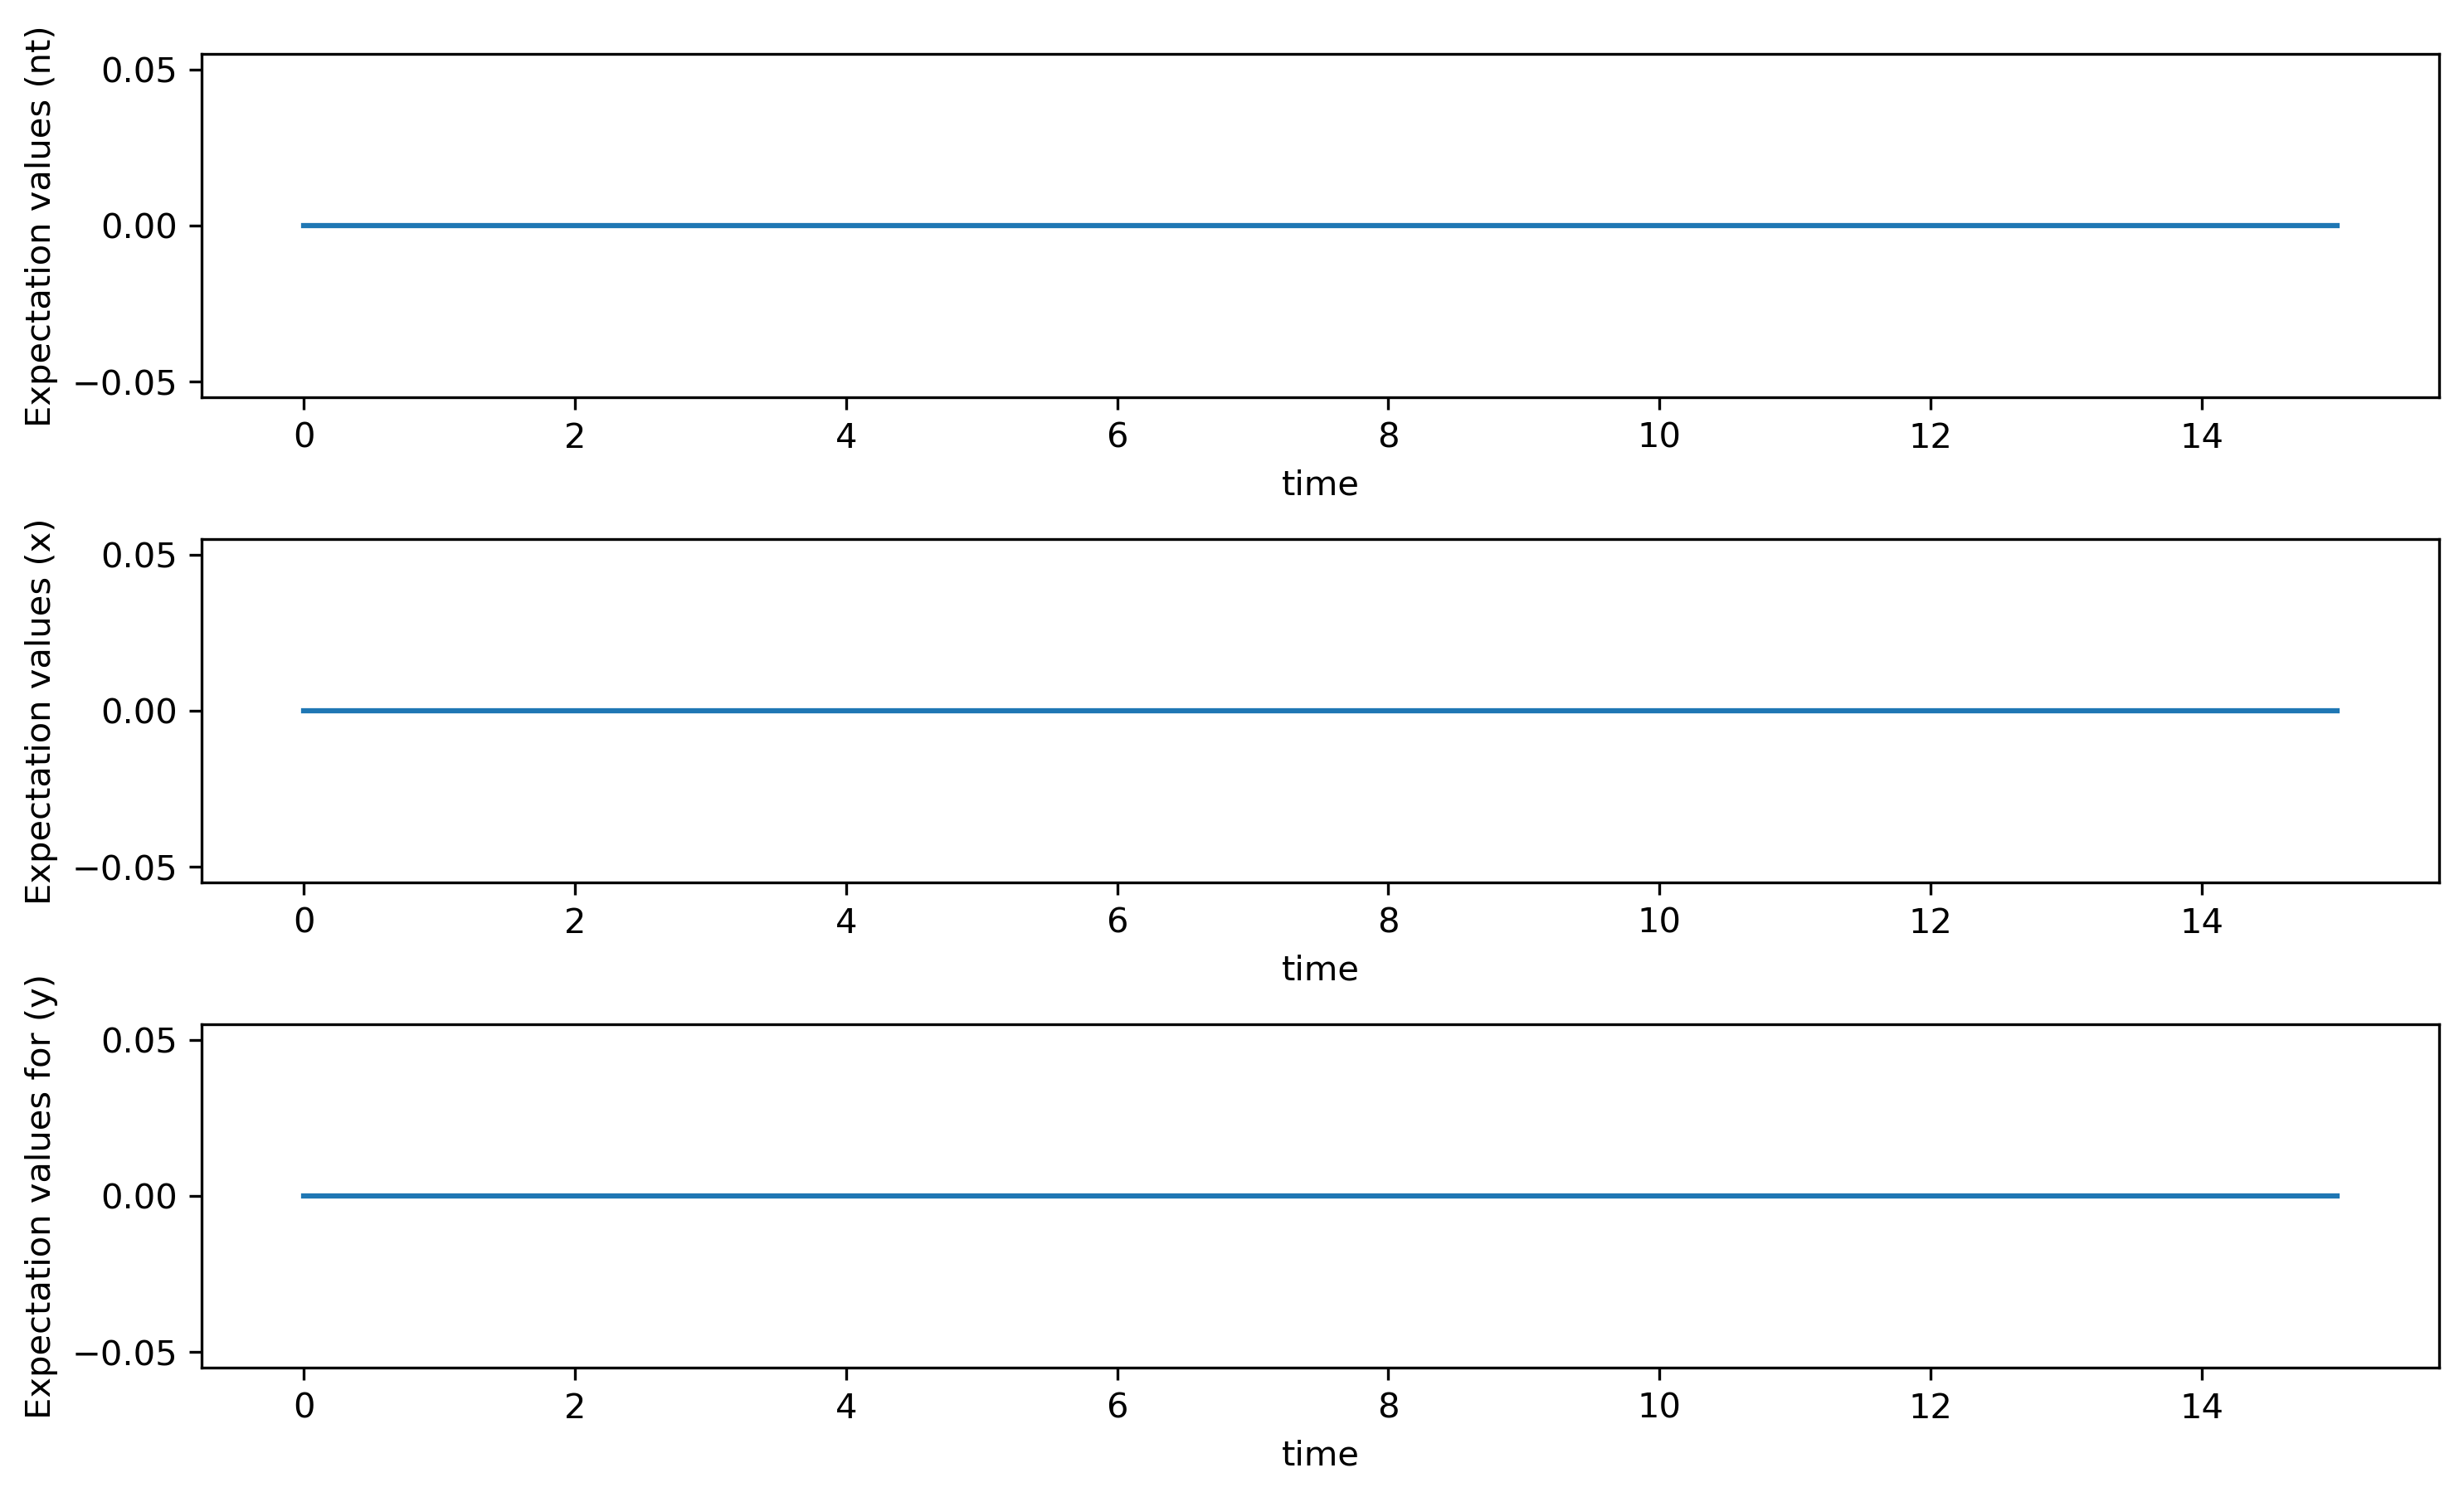

In [10]:
# Expectation values for nt, x and y

fig, exp = plt.subplots(3,1, figsize=(10,6), dpi = 300)
exp[0].set_xlabel('time') 
exp[0].set_ylabel('Expectation values (nt)') 
exp[0].plot(time, result_me.expect[0]) # Number state operator


exp[1].set_xlabel('time') 
exp[1].set_ylabel('Expectation values (x)') 
exp[1].plot(time, result_me.expect[1]) # X quadrature


exp[2].set_xlabel('time') 
exp[2].set_ylabel('Expectation values for (y)') 
exp[2].plot(time, result_me.expect[2]) # Y quadrature

fig.tight_layout()

<hr style="border:2px solid gray"> </hr>

## 1.2. Stochastic master equation solver (Taylor 1.5 solver)

In [11]:
result = smesolve(H, rho0, time, c_ops, sc_ops, e_ops, ntraj=100, nsubsteps=100, solver="taylor15", m_ops = [x, x],
                  method='homodyne', store_measurement=True, map_func=parallel_map, noise=0)    

10.0%. Run time:  17.02s. Est. time left: 00:00:02:33
20.0%. Run time:  23.75s. Est. time left: 00:00:01:35
30.0%. Run time:  33.55s. Est. time left: 00:00:01:18
40.0%. Run time:  40.35s. Est. time left: 00:00:01:00
50.0%. Run time:  50.15s. Est. time left: 00:00:00:50
60.0%. Run time:  58.23s. Est. time left: 00:00:00:38
70.0%. Run time:  67.61s. Est. time left: 00:00:00:28
80.0%. Run time:  76.03s. Est. time left: 00:00:00:19
90.0%. Run time:  86.35s. Est. time left: 00:00:00:09
100.0%. Run time:  93.77s. Est. time left: 00:00:00:00
Total run time:  93.85s


<hr style="border:2px solid gray"> </hr>

## 2. Noise measurements - X and Y quadrature operators

### 2.1. Single quantum trajectory for X quadrature measurement

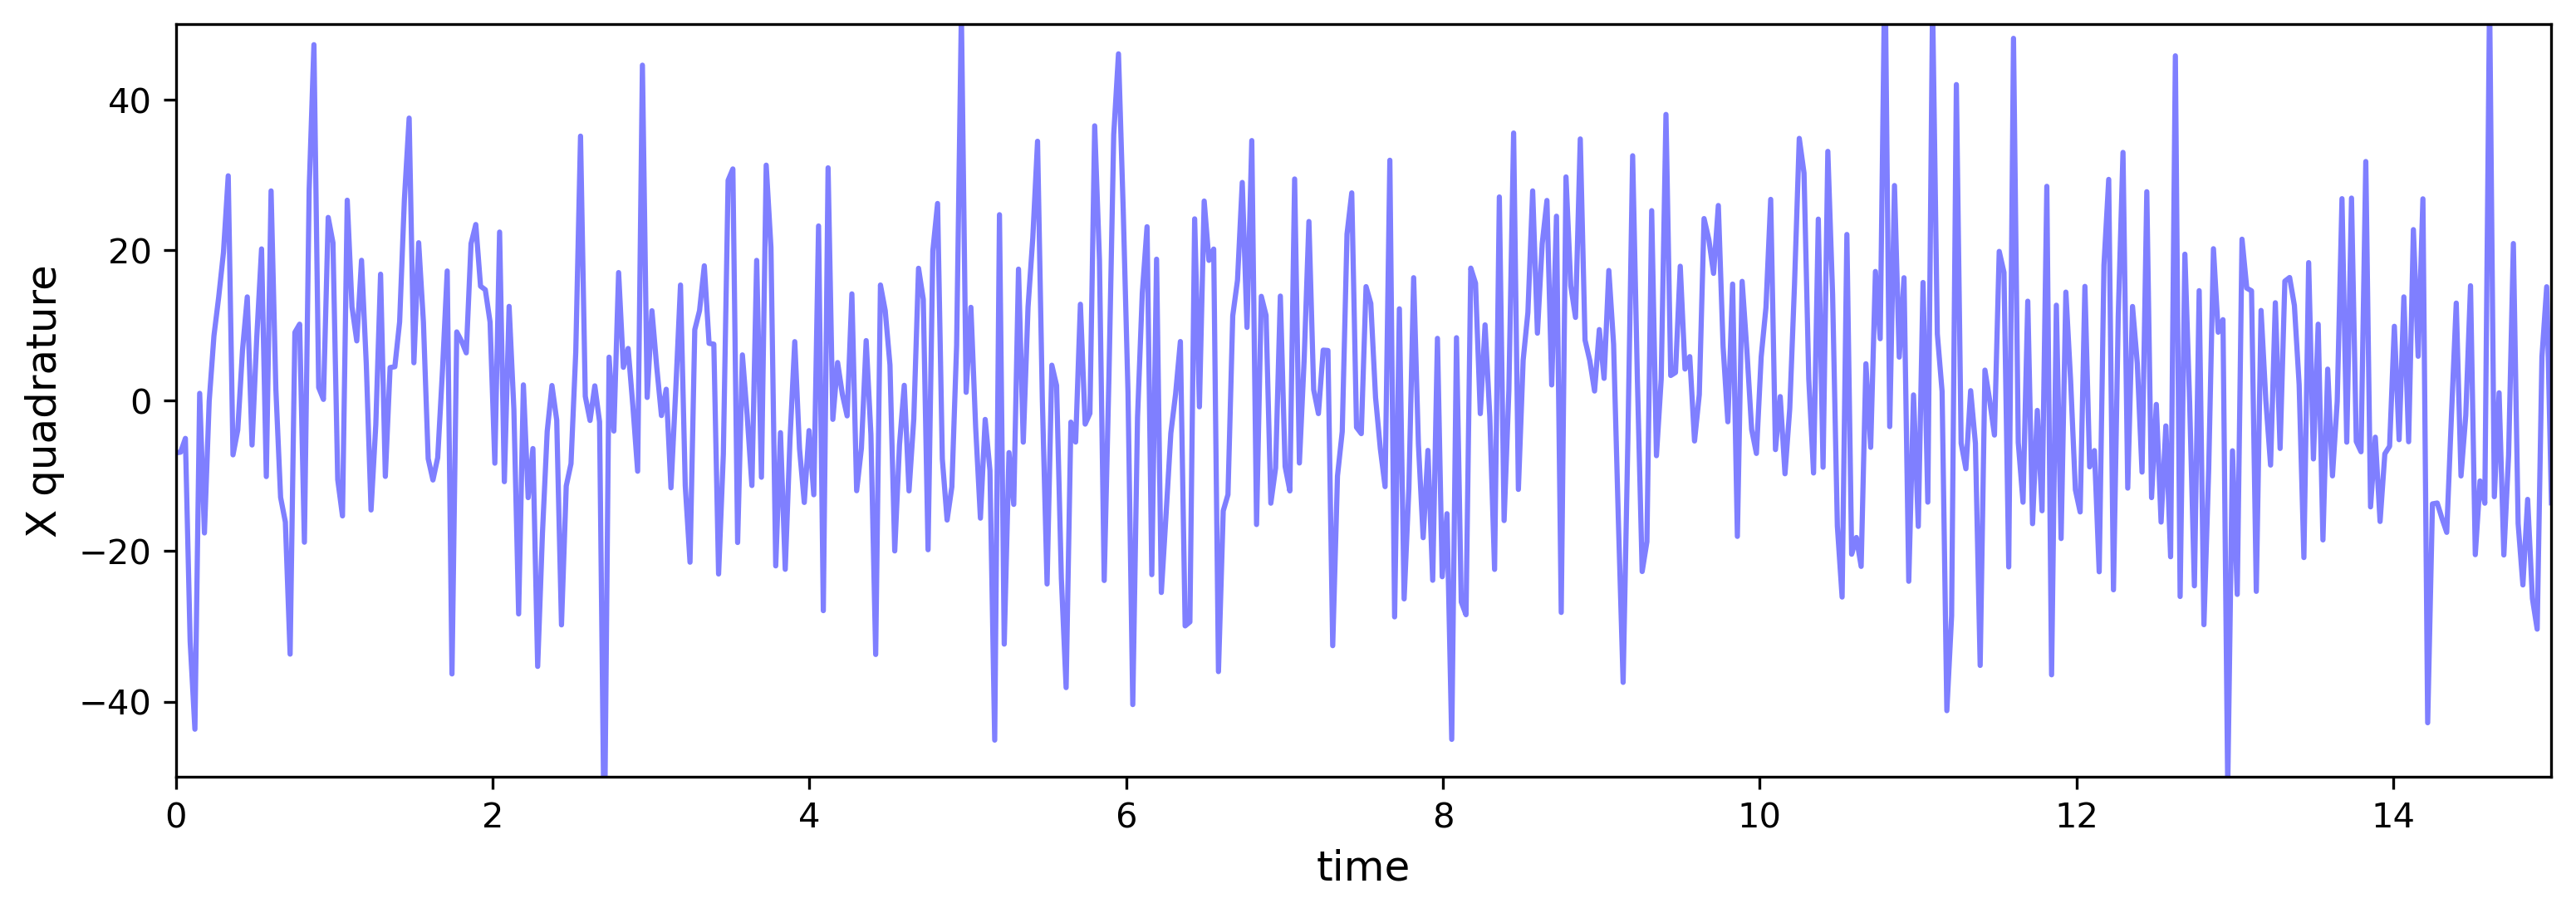

In [12]:
fig, pt = plt.subplots(figsize=(12.3,4), dpi = 300)
M = np.sqrt(eta * kappa)
for m in result.measurement:
    pt.plot(time, m[:, 0].real / M, 'b', alpha = 0.5) # X quadrature plot for a single quantum trajectory
    break
    
pt.set_ylim(-50, 50)
pt.set_xlim(0, time.max())
pt.set_ylabel('X quadrature', fontsize = 12)
pt.set_xlabel('time', fontsize = 12);

## 2.2. Plot showing ntraj = 100 quantum trajectories for X quadrature measurement

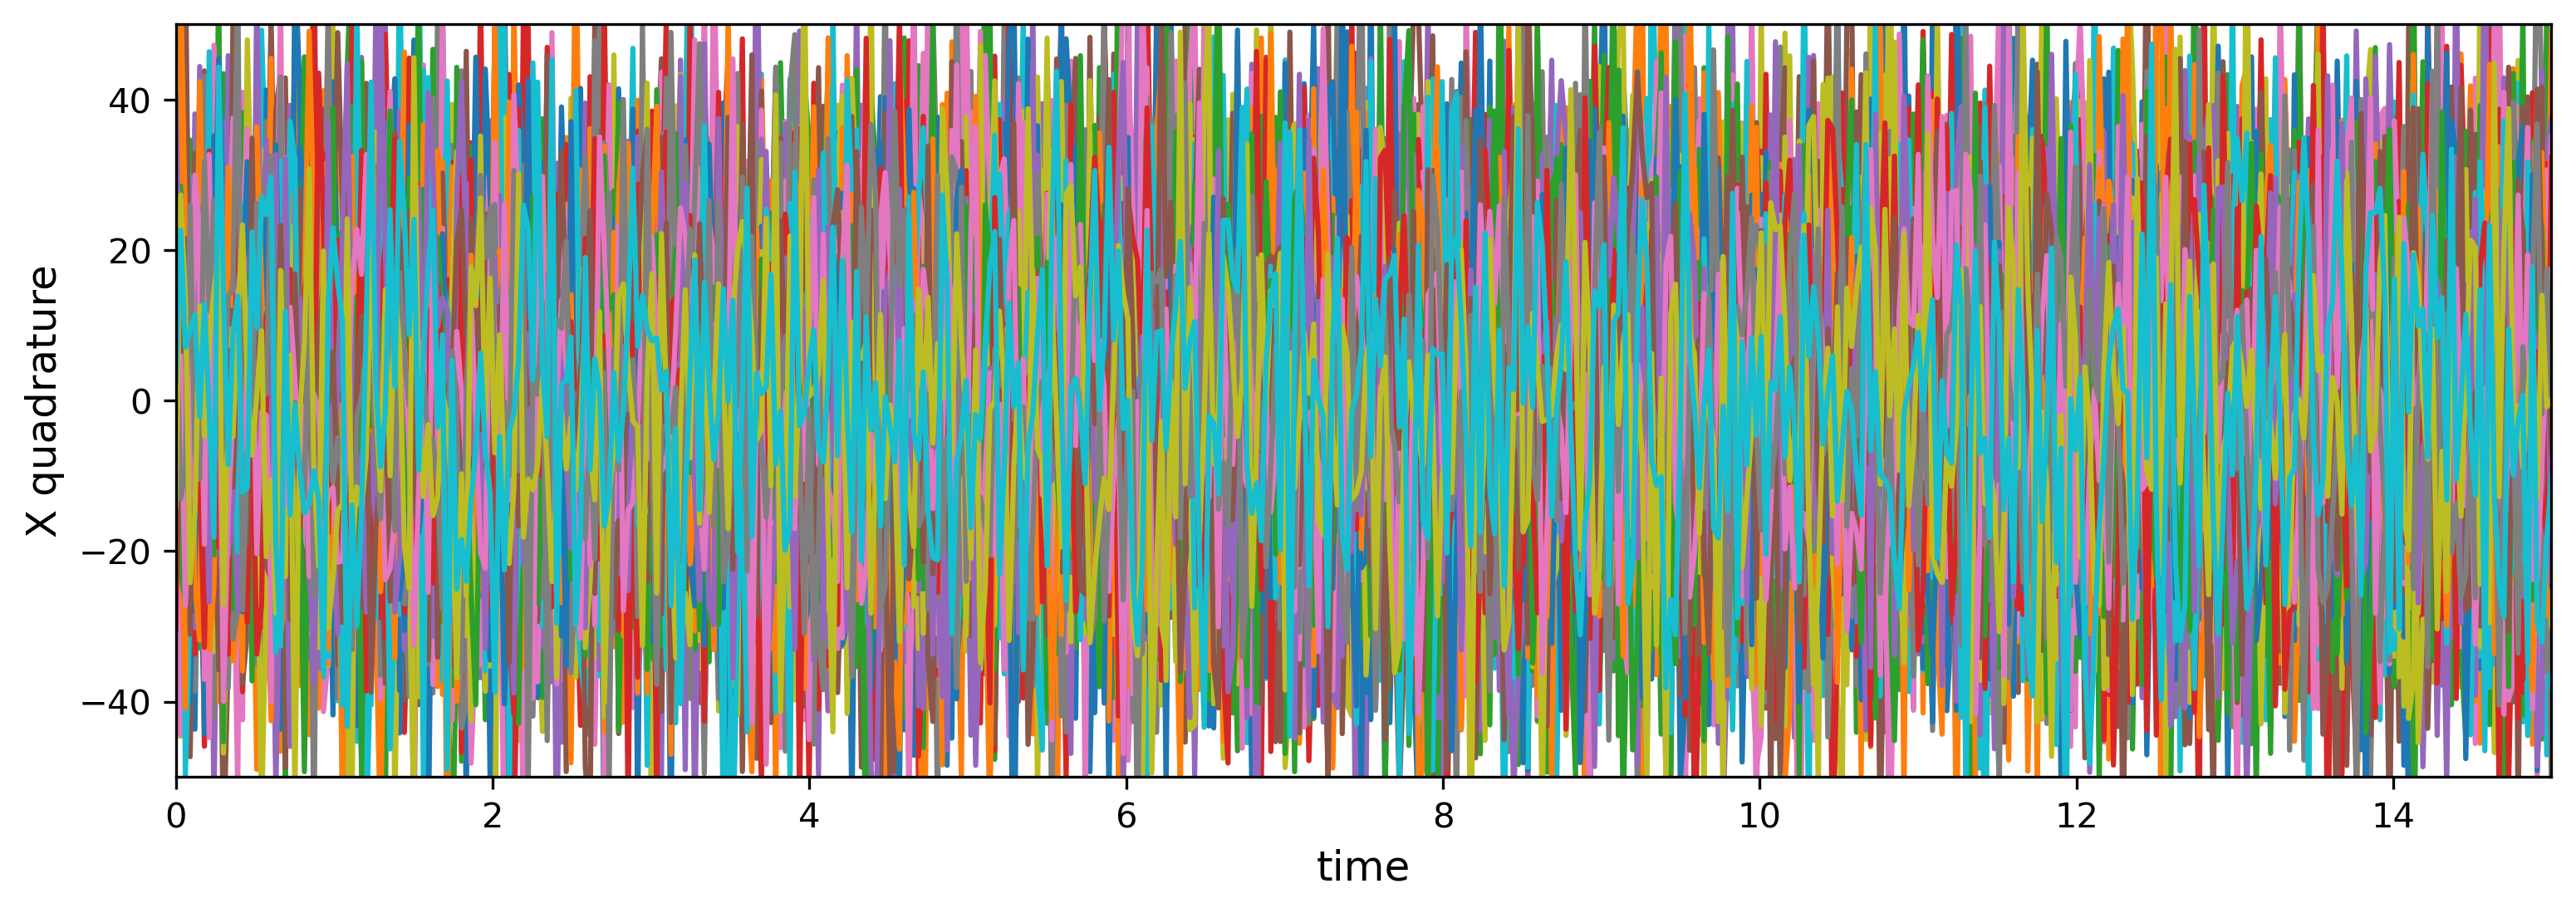

In [13]:
fig, pt = plt.subplots(figsize=(12.3,4), dpi = 300)
for m in result.measurement:
    pt.plot(time, m[:, 0].real / M) # X quadrature plot for a single quantum trajectory
    
pt.set_ylim(-50, 50)
pt.set_xlim(0, time.max())
pt.set_ylabel('X quadrature', fontsize = 12)
pt.set_xlabel('time', fontsize = 12);

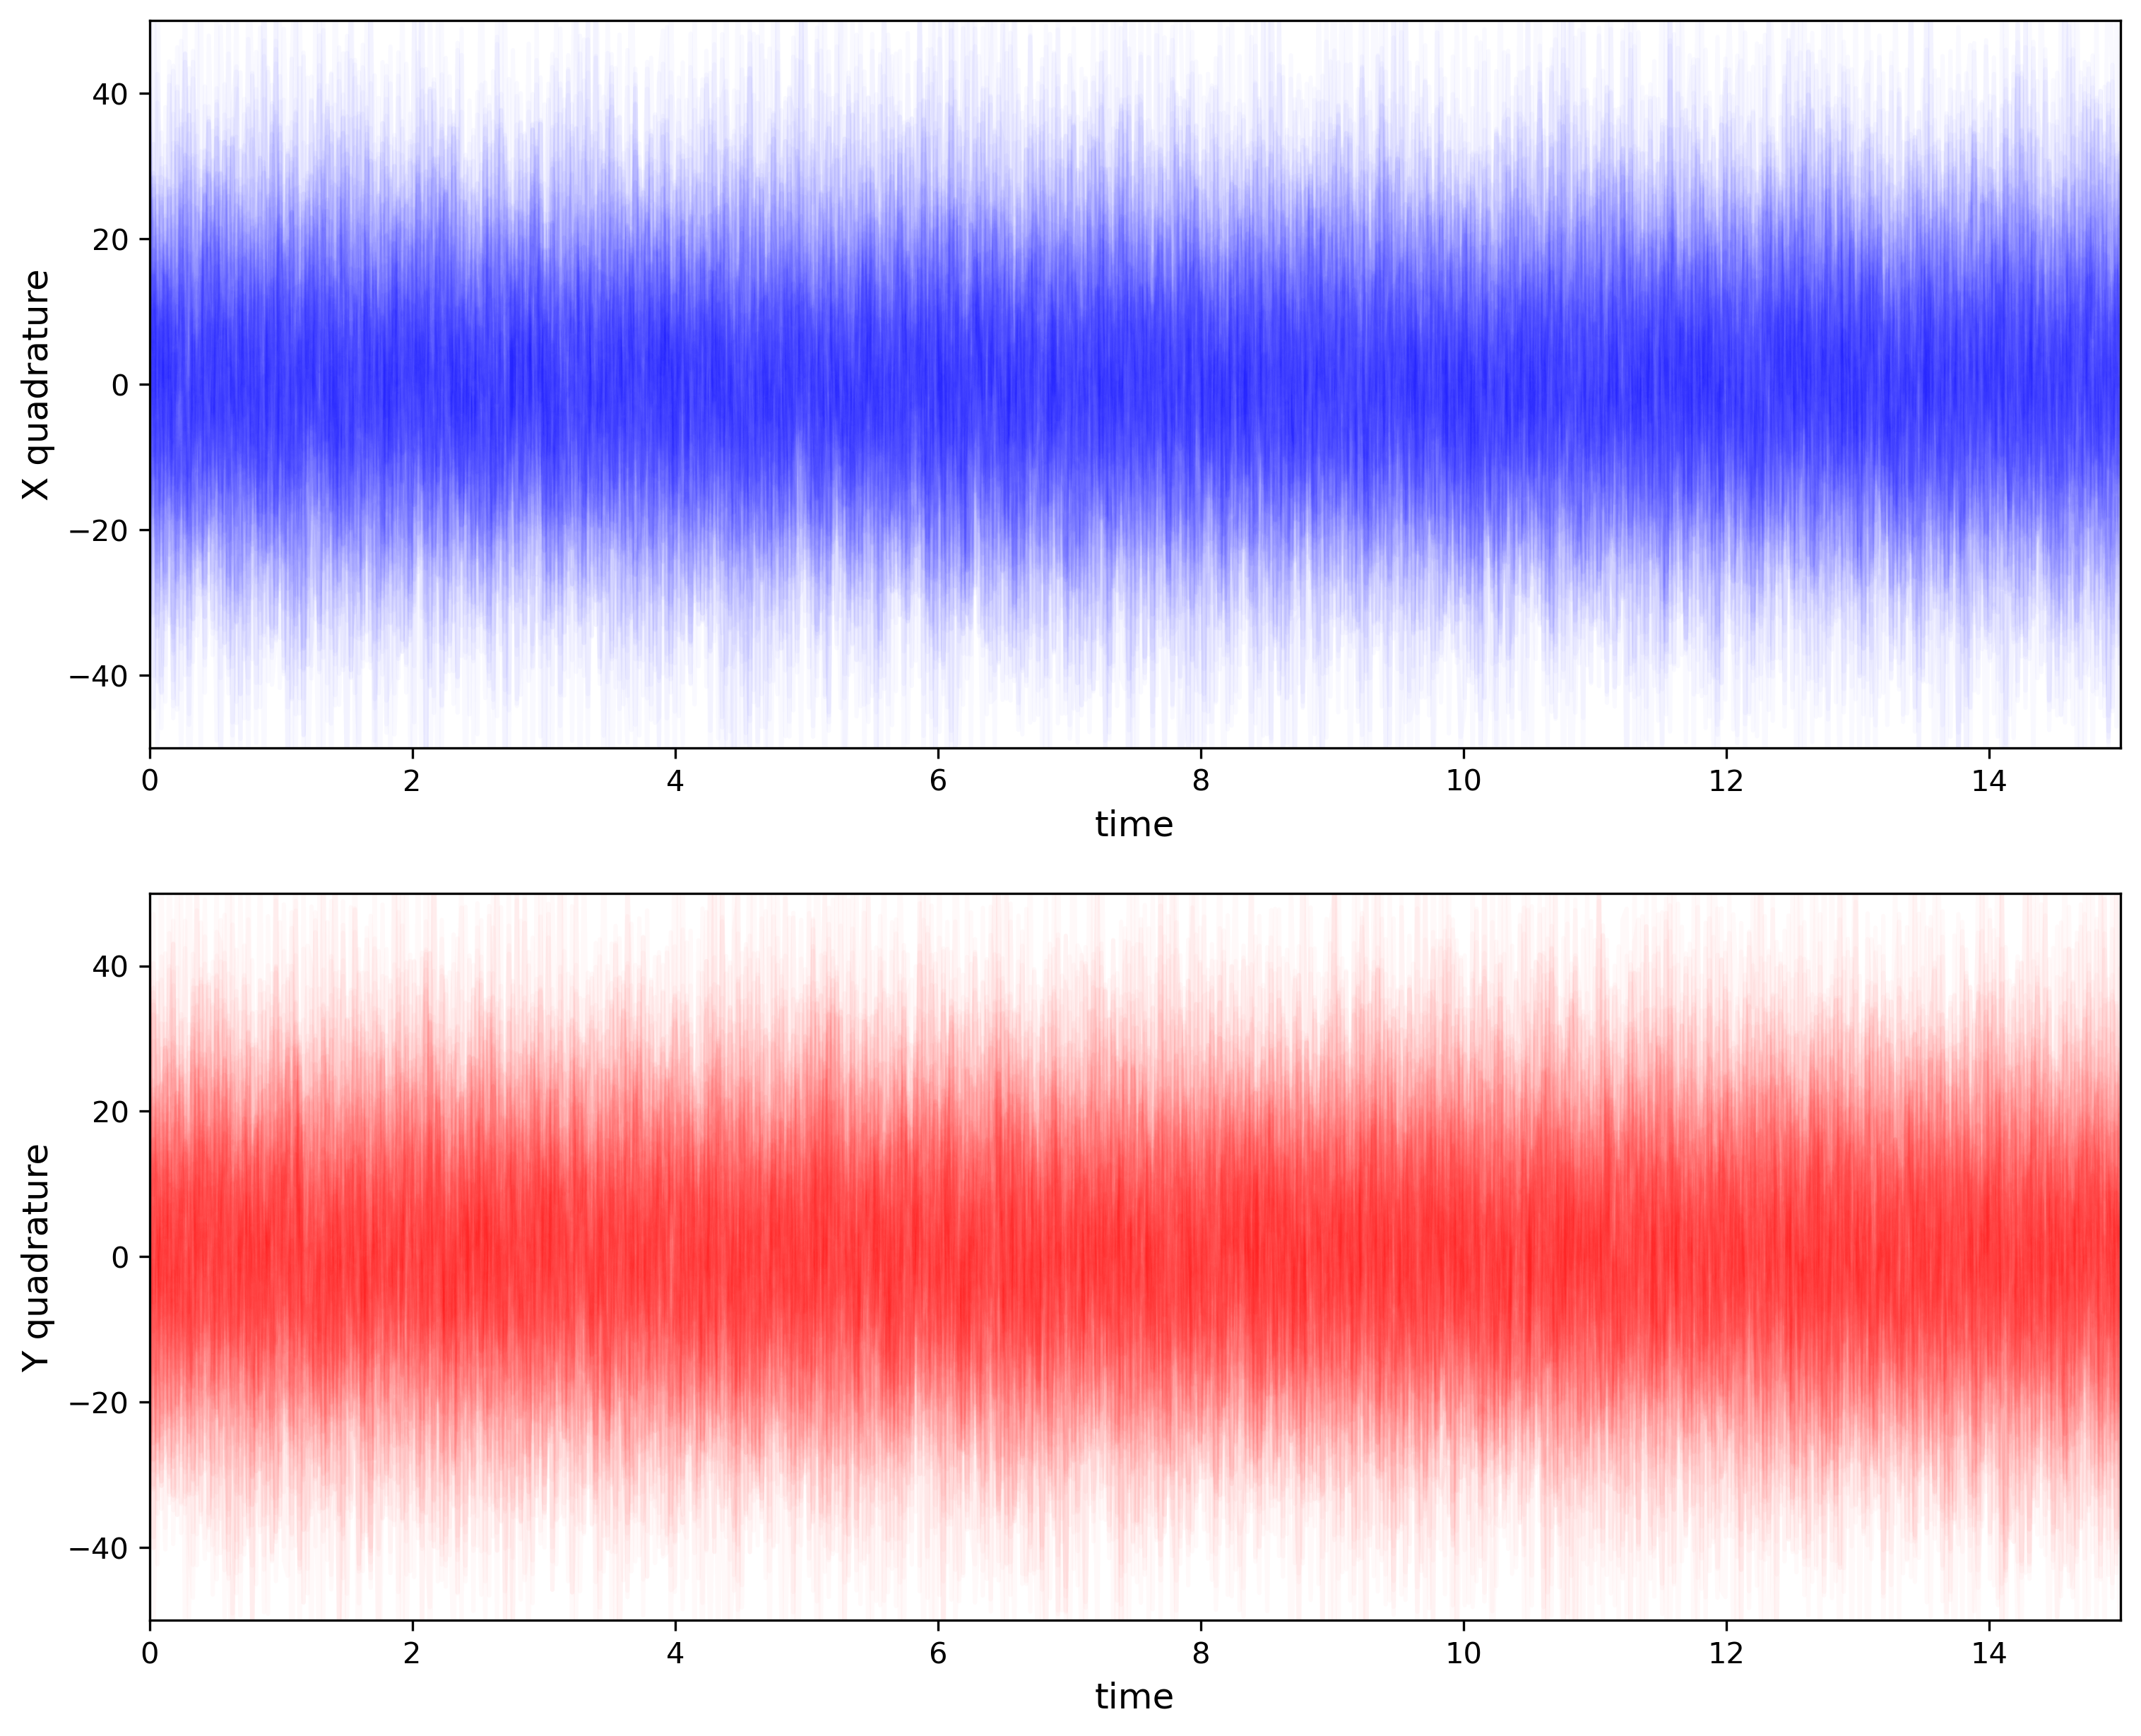

In [14]:
from matplotlib import pyplot as plt
from scipy import stats

fig, p = plt.subplots(2,1, figsize=(12,10), dpi = 300)
for m in result.measurement:
    p[0].plot(time, m[:, 0].real / M, 'b', alpha = 0.025) # X quadrature plot for a single quantum trajectory
    p[1].plot(time, m[:, 1].real / M, 'r', alpha = 0.025) # Y quadrature plot for a single quantum trajectory

p[0].set_ylim(-50, 50)
p[0].set_xlim(0, time.max())
p[0].set_ylabel('X quadrature', fontsize = 12)
p[0].set_xlabel('time', fontsize = 12)

p[1].set_ylim(-50, 50)
p[1].set_xlim(0, time.max())
p[1].set_ylabel('Y quadrature', fontsize = 12)
p[1].set_xlabel('time', fontsize = 12);

## 2.4. Measurement result

In [26]:
# Measurement result stored in result object
#for m in result.measurement:
    #print(m[:, 0].real/ M)

<hr style="border:2px solid gray"> </hr>

## 3. Binning 

### 3.1. Histogram of X quadrature measurement

500
500


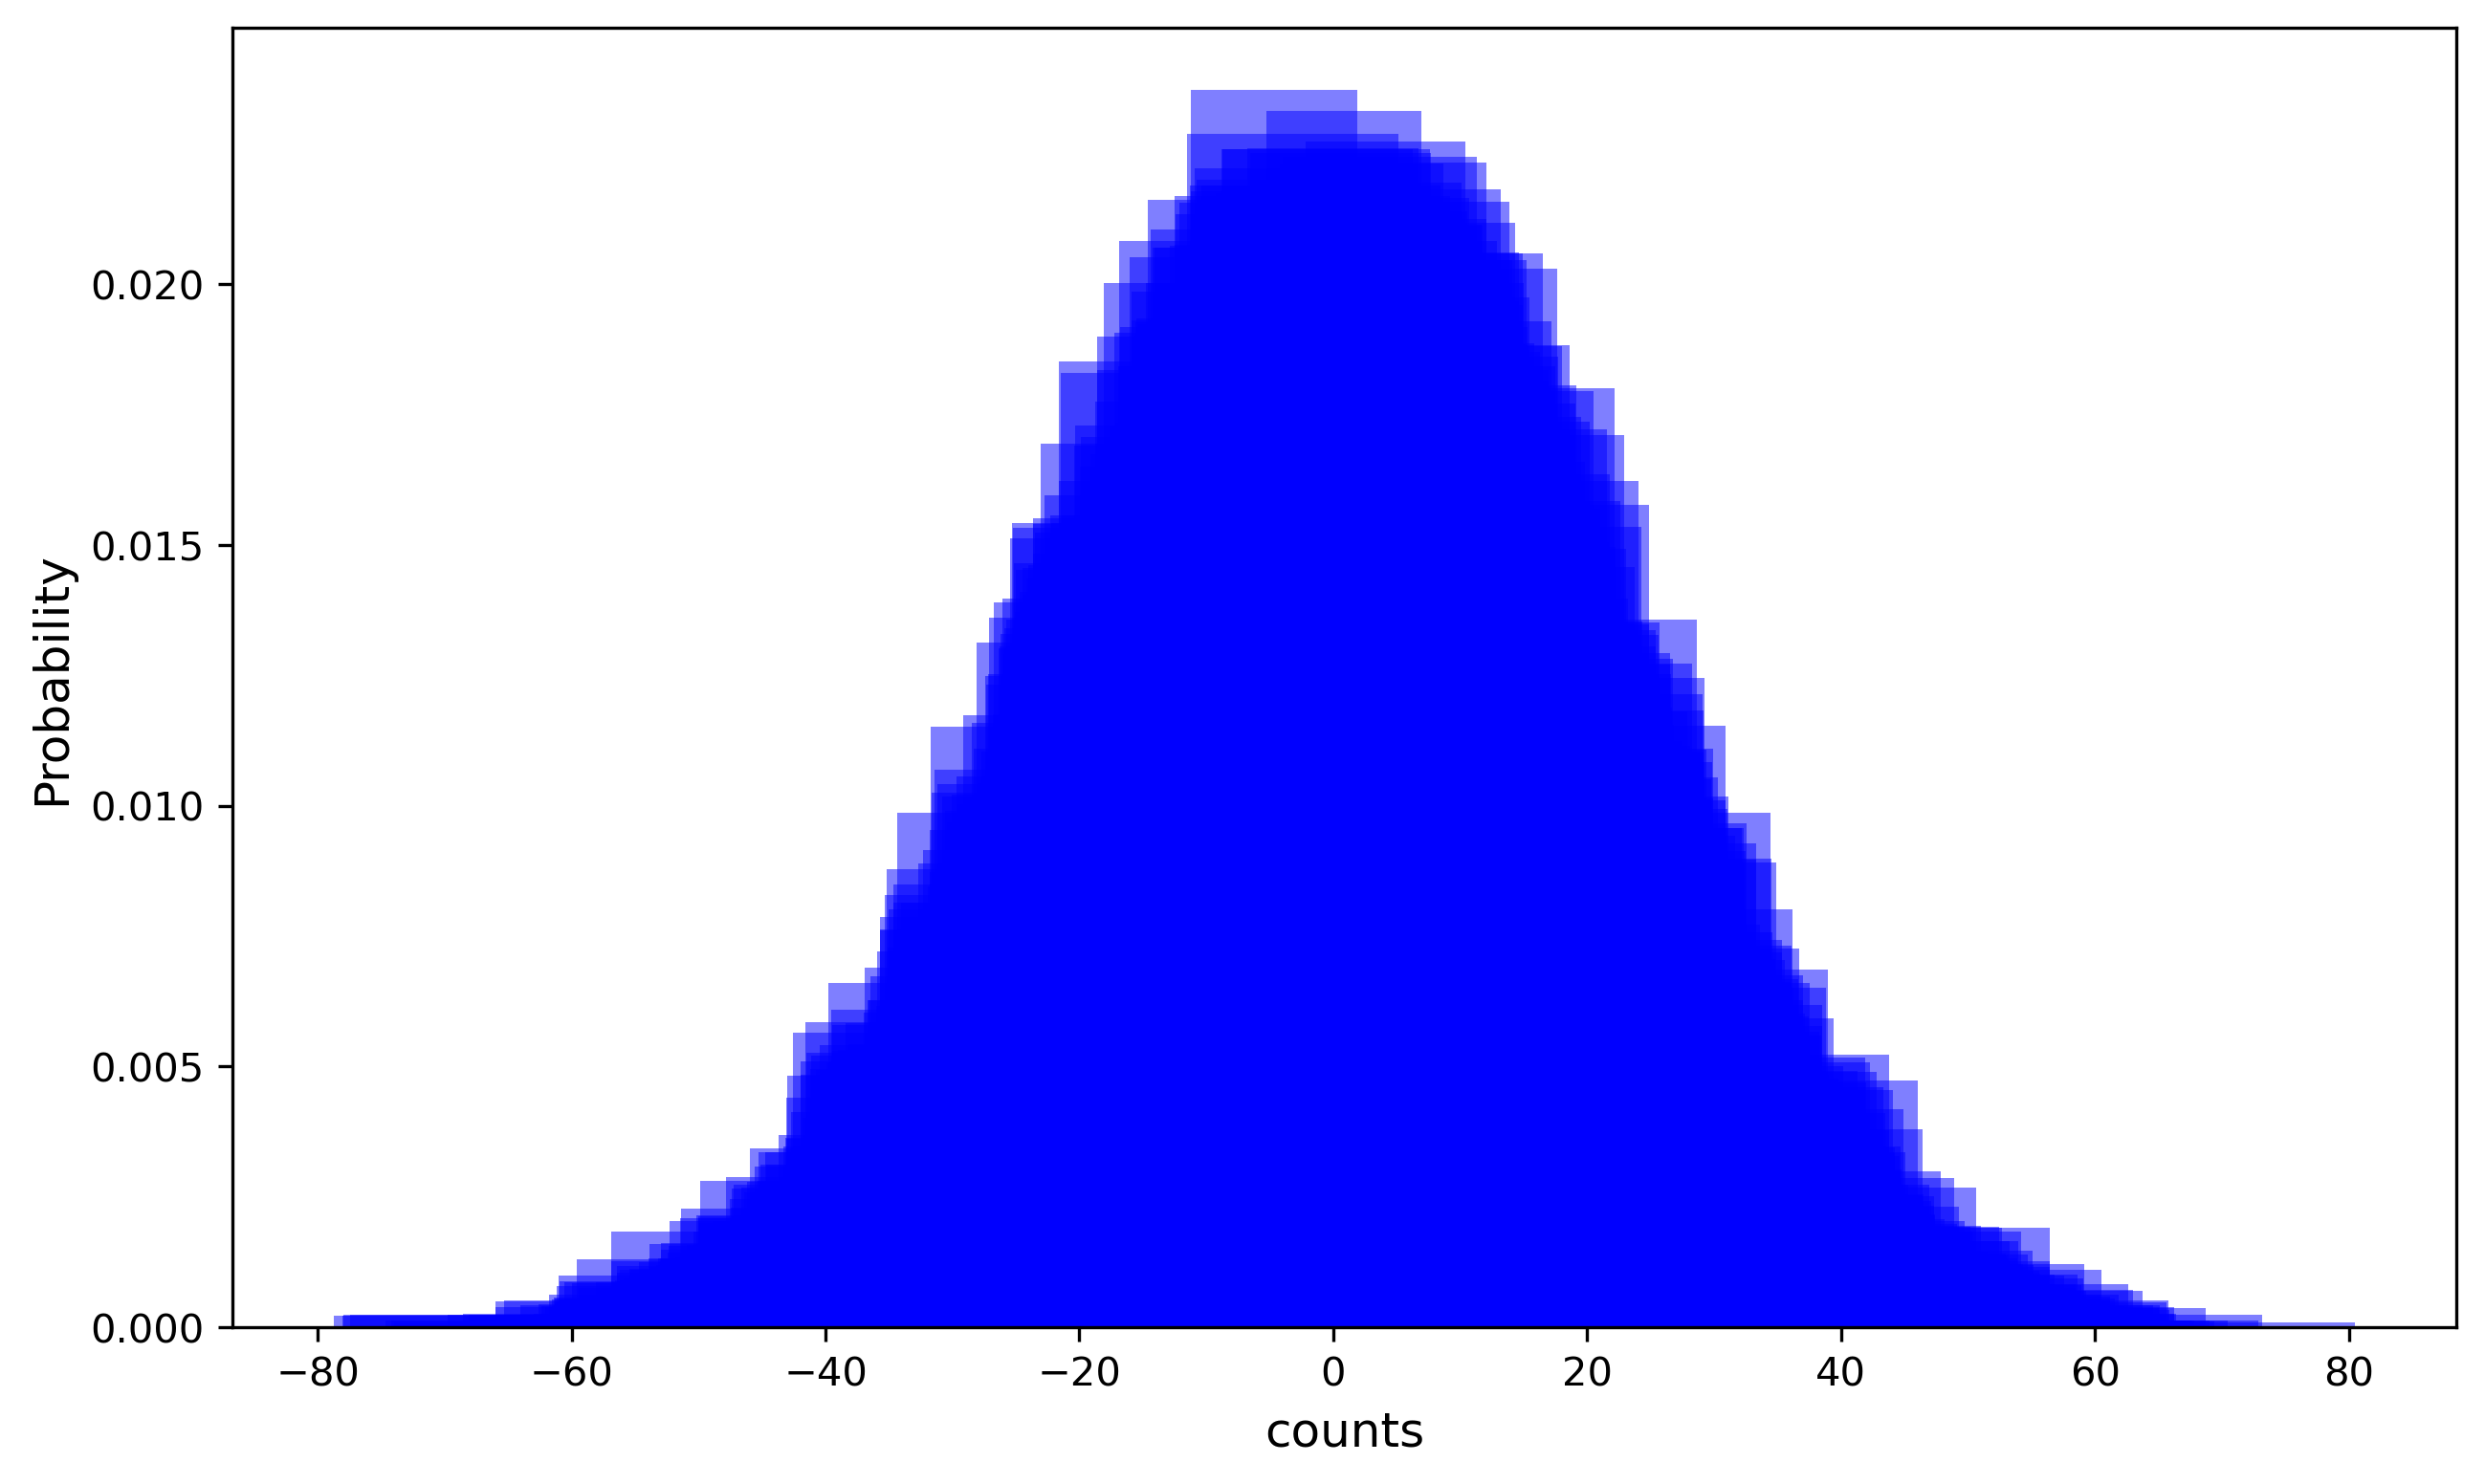

In [16]:
from matplotlib import pyplot
from scipy import stats
fig, h = pyplot.subplots(figsize=(10,6), dpi = 300)

M = np.sqrt(eta * kappa)

for m in result.measurement:
    pyplot.hist(m[:, 0].real / M, 8,  density = 1, alpha = 0.5, color = 'blue') # Histogram for a single quantum trajectory
  

h.set_xlabel('counts', fontsize=12)
h.set_ylabel('Probability', fontsize=12)
means = np.array(result.measurement).mean(axis=0)[:,0].real
print(len(means))
print(len(time))

### 3.2. Histogram of Y quadrature measurement

500
500


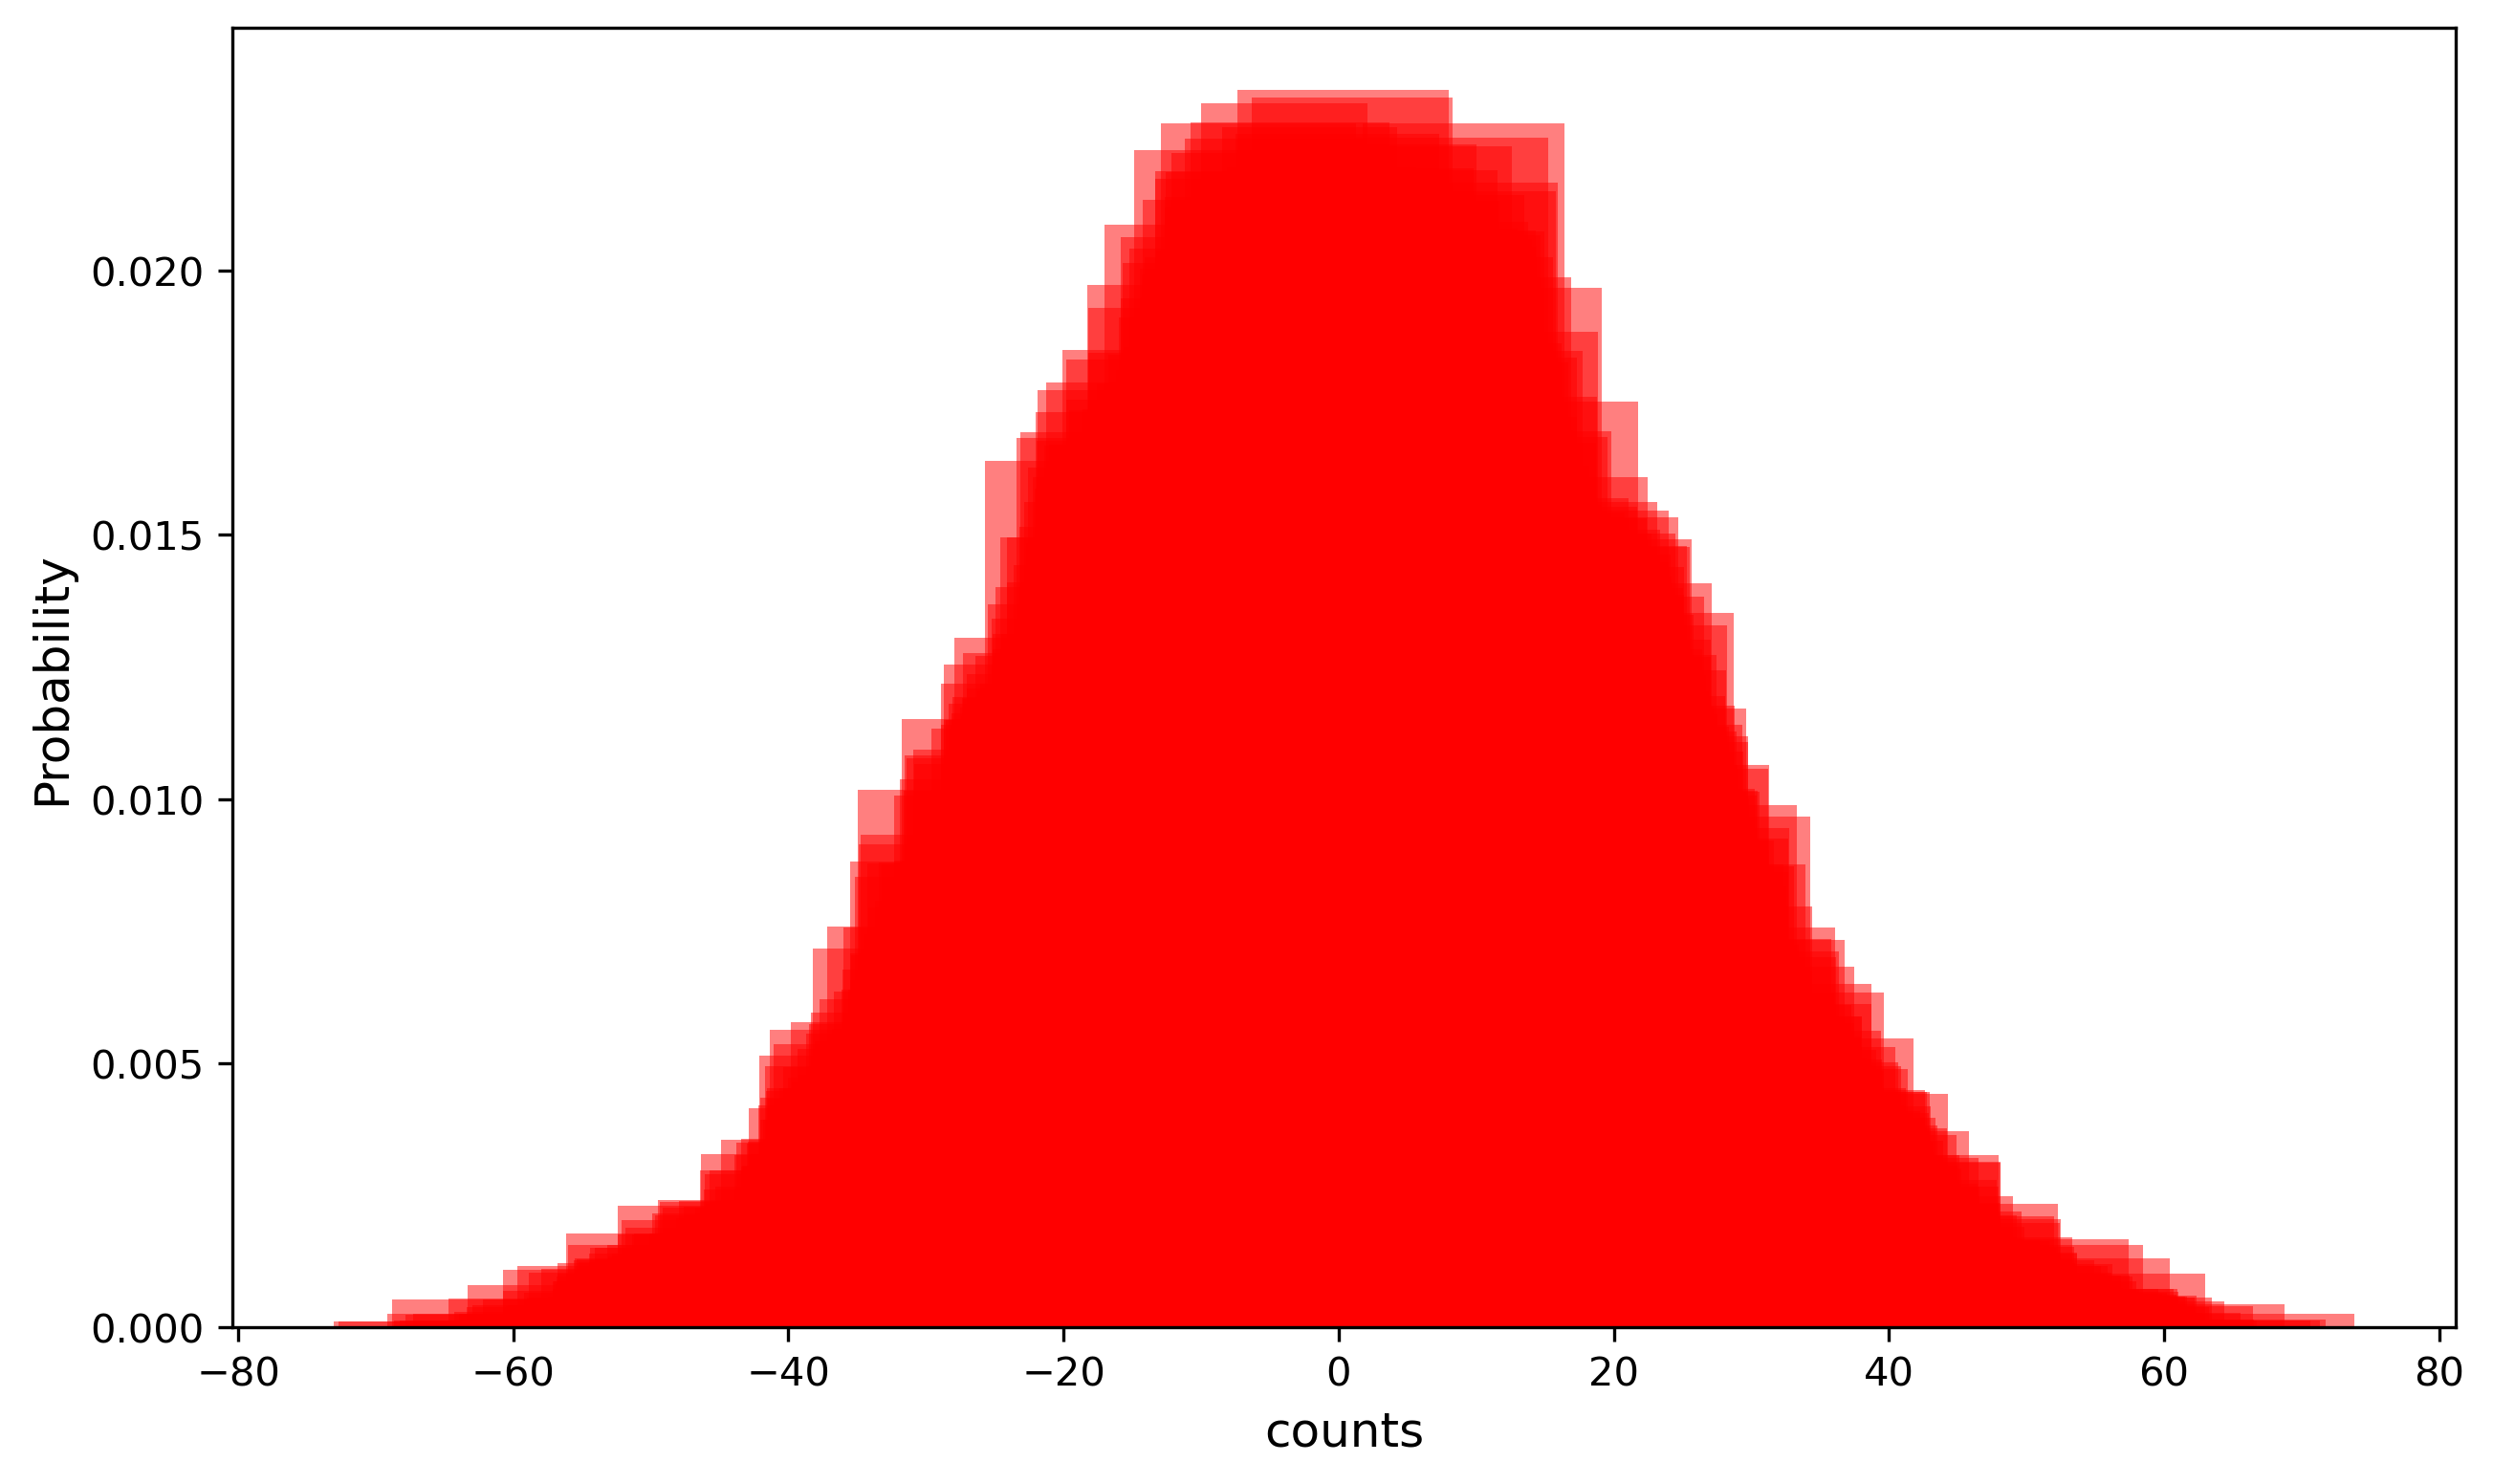

In [17]:
from matplotlib import pyplot
from scipy import stats
fig, h = pyplot.subplots(figsize=(10,6), dpi = 300)

M = np.sqrt(eta * kappa)

for m in result.measurement:
    pyplot.hist(m[:, 1].real / M, 8,  density = 1, alpha = 0.5, color = 'red') # Histogram for a single quantum trajectory
  

h.set_xlabel('counts', fontsize=12)
h.set_ylabel('Probability', fontsize=12)

means = np.array(result.measurement).mean(axis=0)[:,0].real
print(len(means))
print(len(time))

### 3.3. Binning for a singe quantum trajectory (X quadrature)

500
500


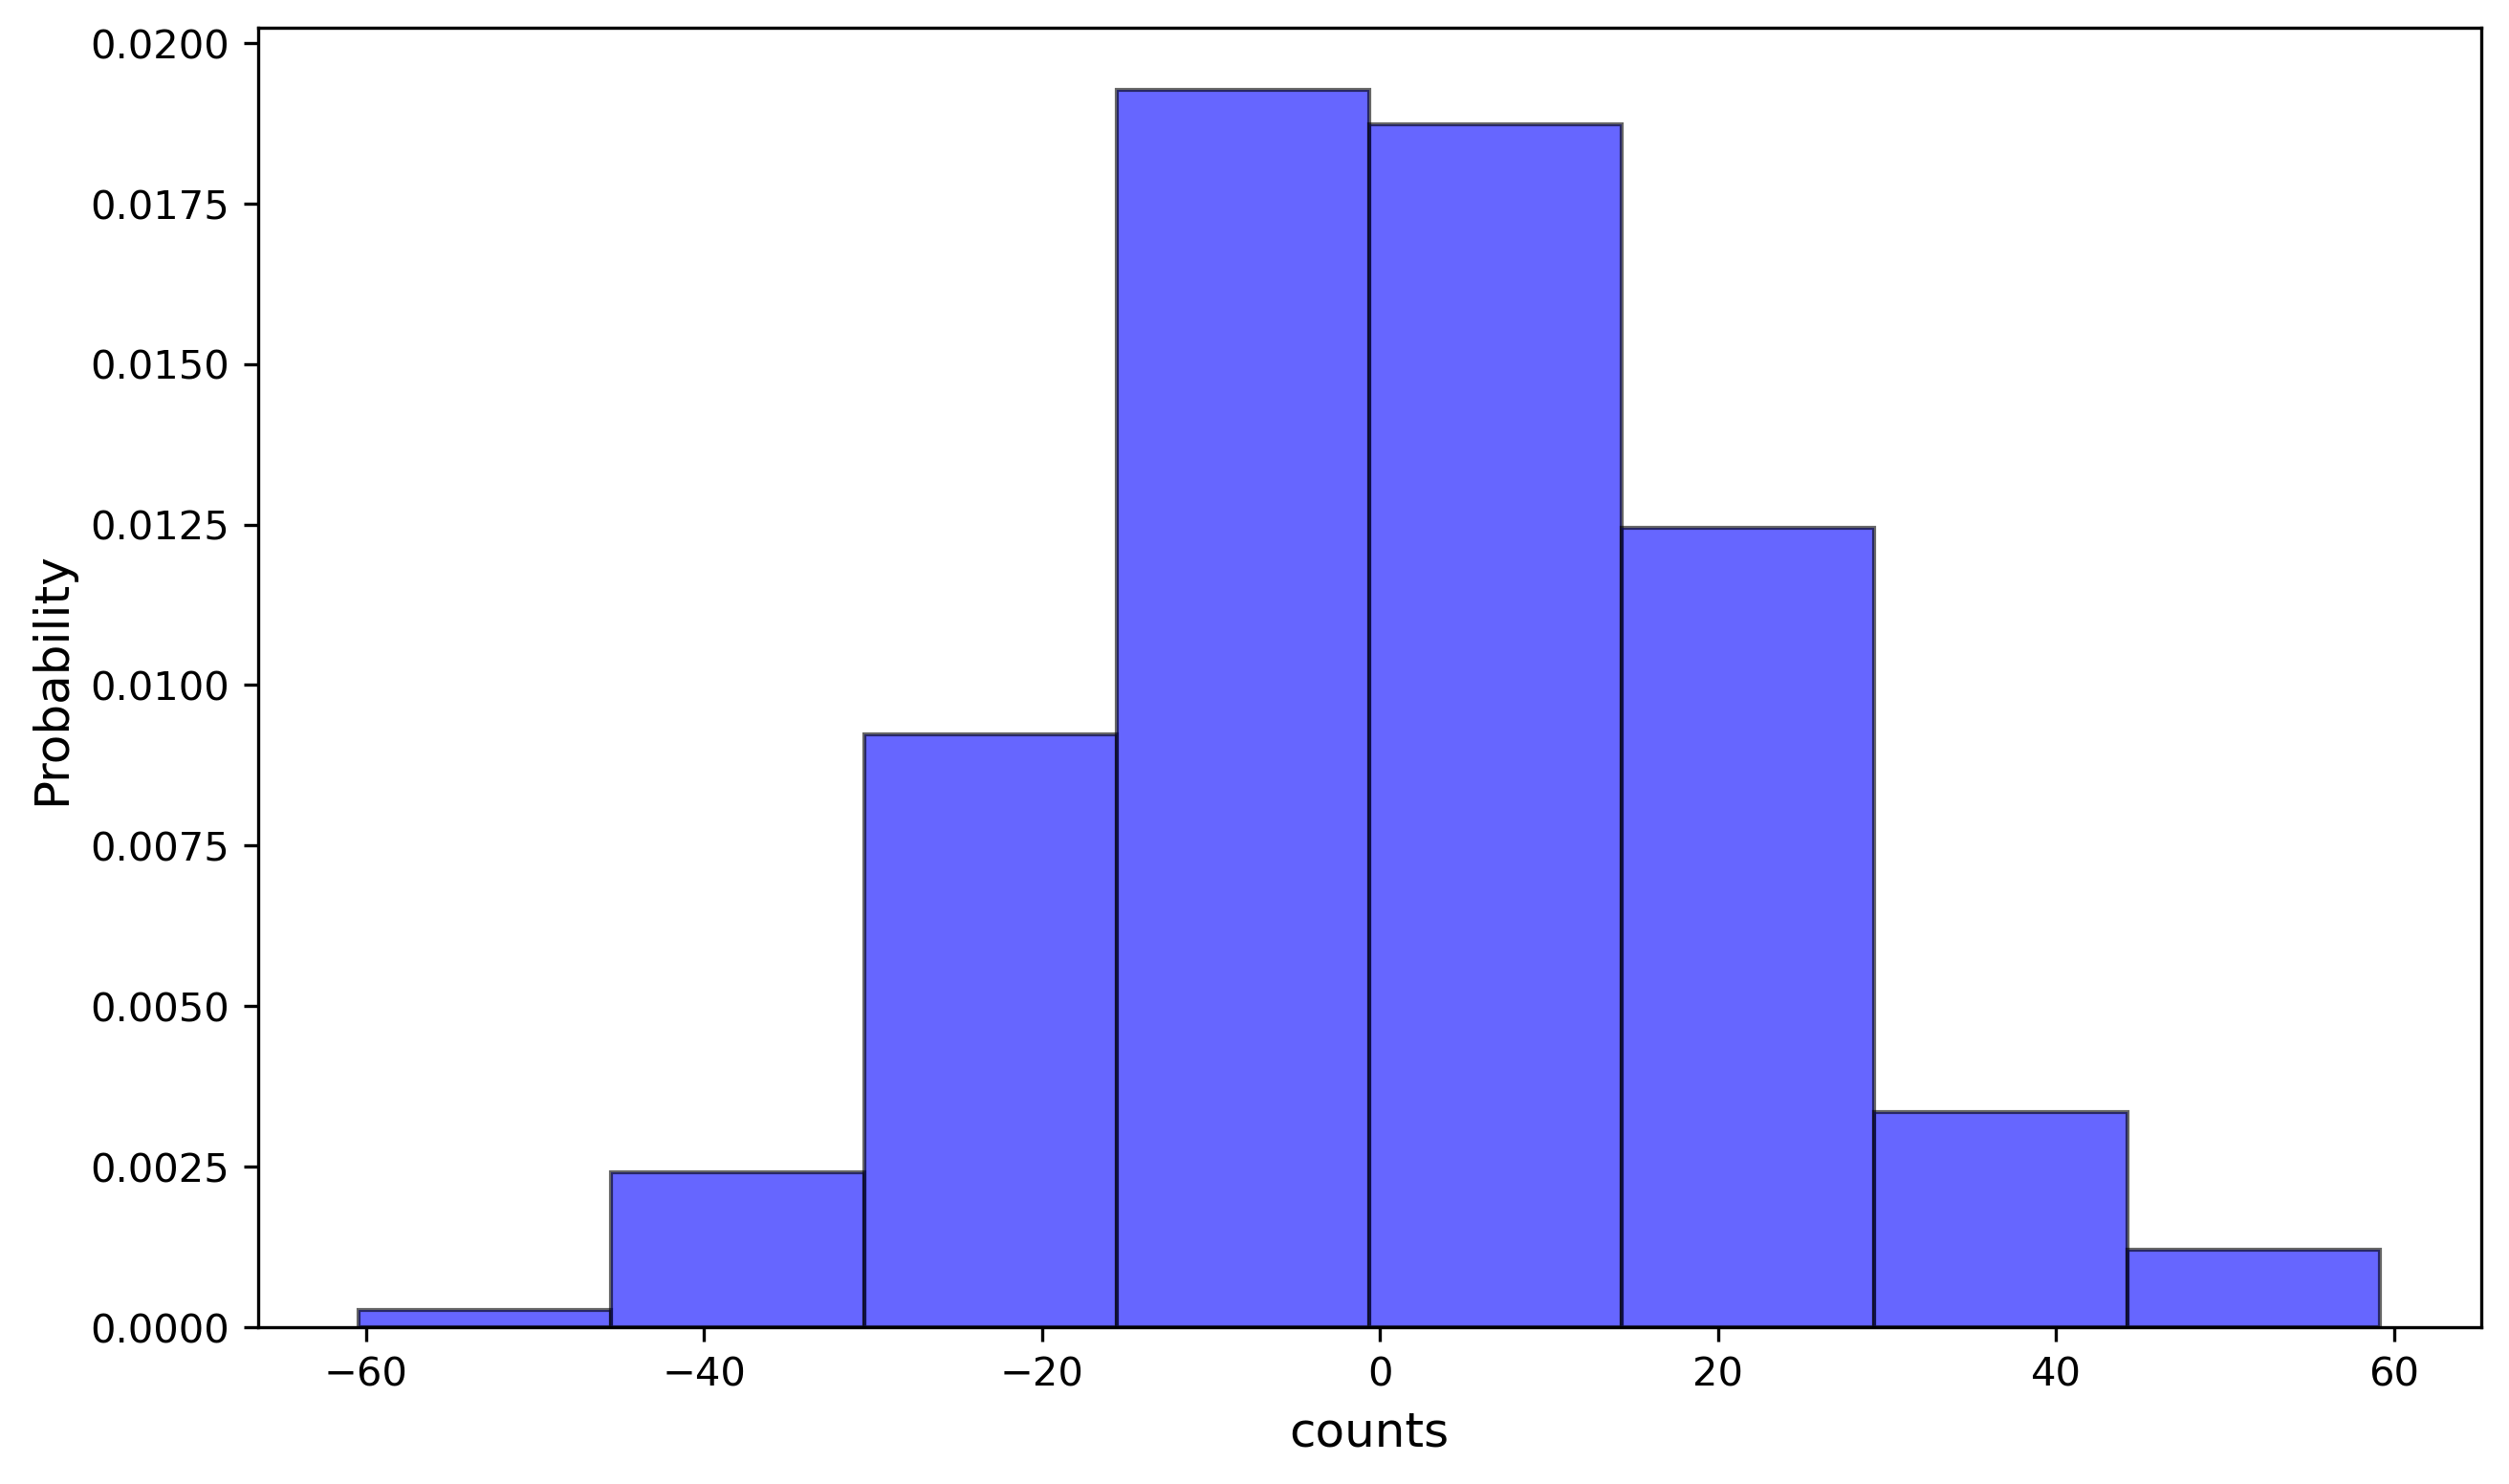

In [18]:
from matplotlib import pyplot
from scipy import stats
fig, h = pyplot.subplots(figsize=(10,6), dpi = 300)

M = np.sqrt(eta * kappa)

for m in result.measurement:
    pyplot.hist(m[:, 0].real / M, 8,  density = 1, edgecolor="black", alpha = 0.6, color = 'blue') # Histogram for a single quantum trajectory
    break  

h.set_xlabel('counts', fontsize=12)
h.set_ylabel('Probability', fontsize=12)

means = np.array(result.measurement).mean(axis=0)[:,0].real
print(len(means))
print(len(time))

## 3.4. Plot showing binning for ntraj = 100 quantum trajectories - X quadrature

500
500


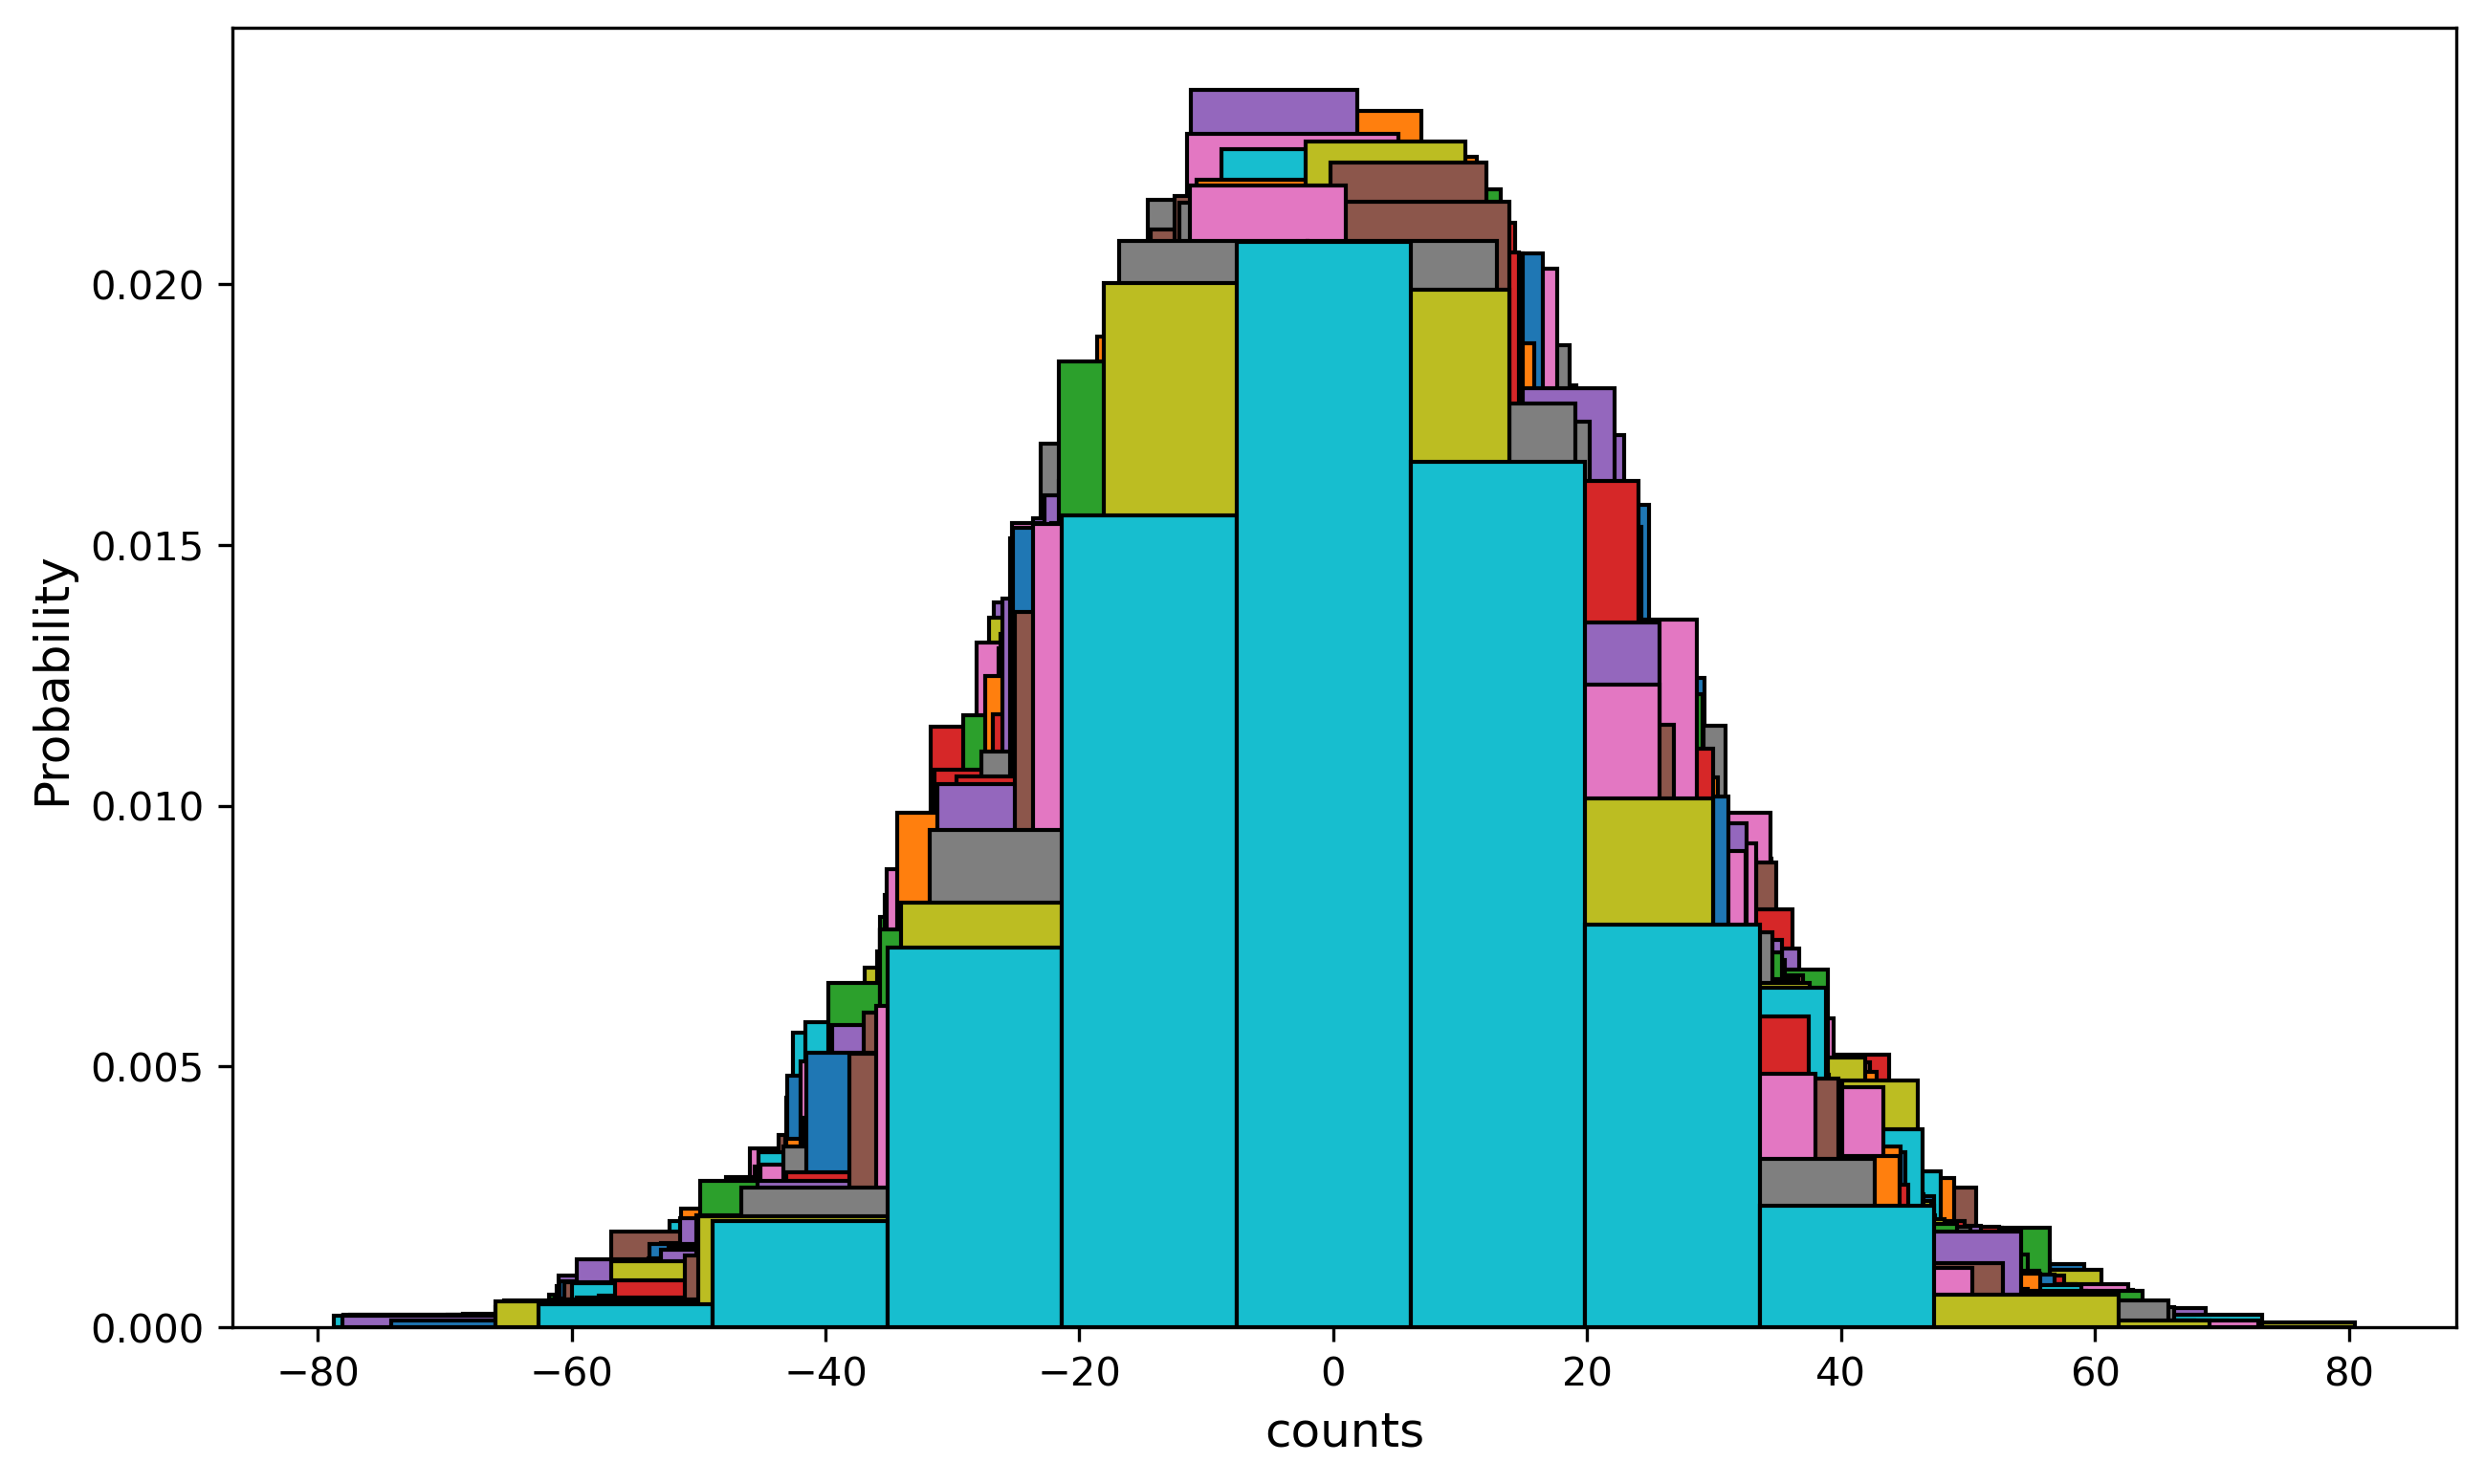

In [19]:
from matplotlib import pyplot
from scipy import stats
fig, h = pyplot.subplots(figsize=(10,6), dpi = 300)

M = np.sqrt(eta * kappa)

for m in result.measurement:
    pyplot.hist(m[:, 0].real / M, 8,  density = 1, edgecolor="black") # Histogram for a single quantum trajectory

h.set_xlabel('counts', fontsize=12)
h.set_ylabel('Probability', fontsize=12)

means = np.array(result.measurement).mean(axis=0)[:,0].real
print(len(means))
print(len(time))

## 4. Raw data extraction

150000


Text(0, 0.5, 'Probability')

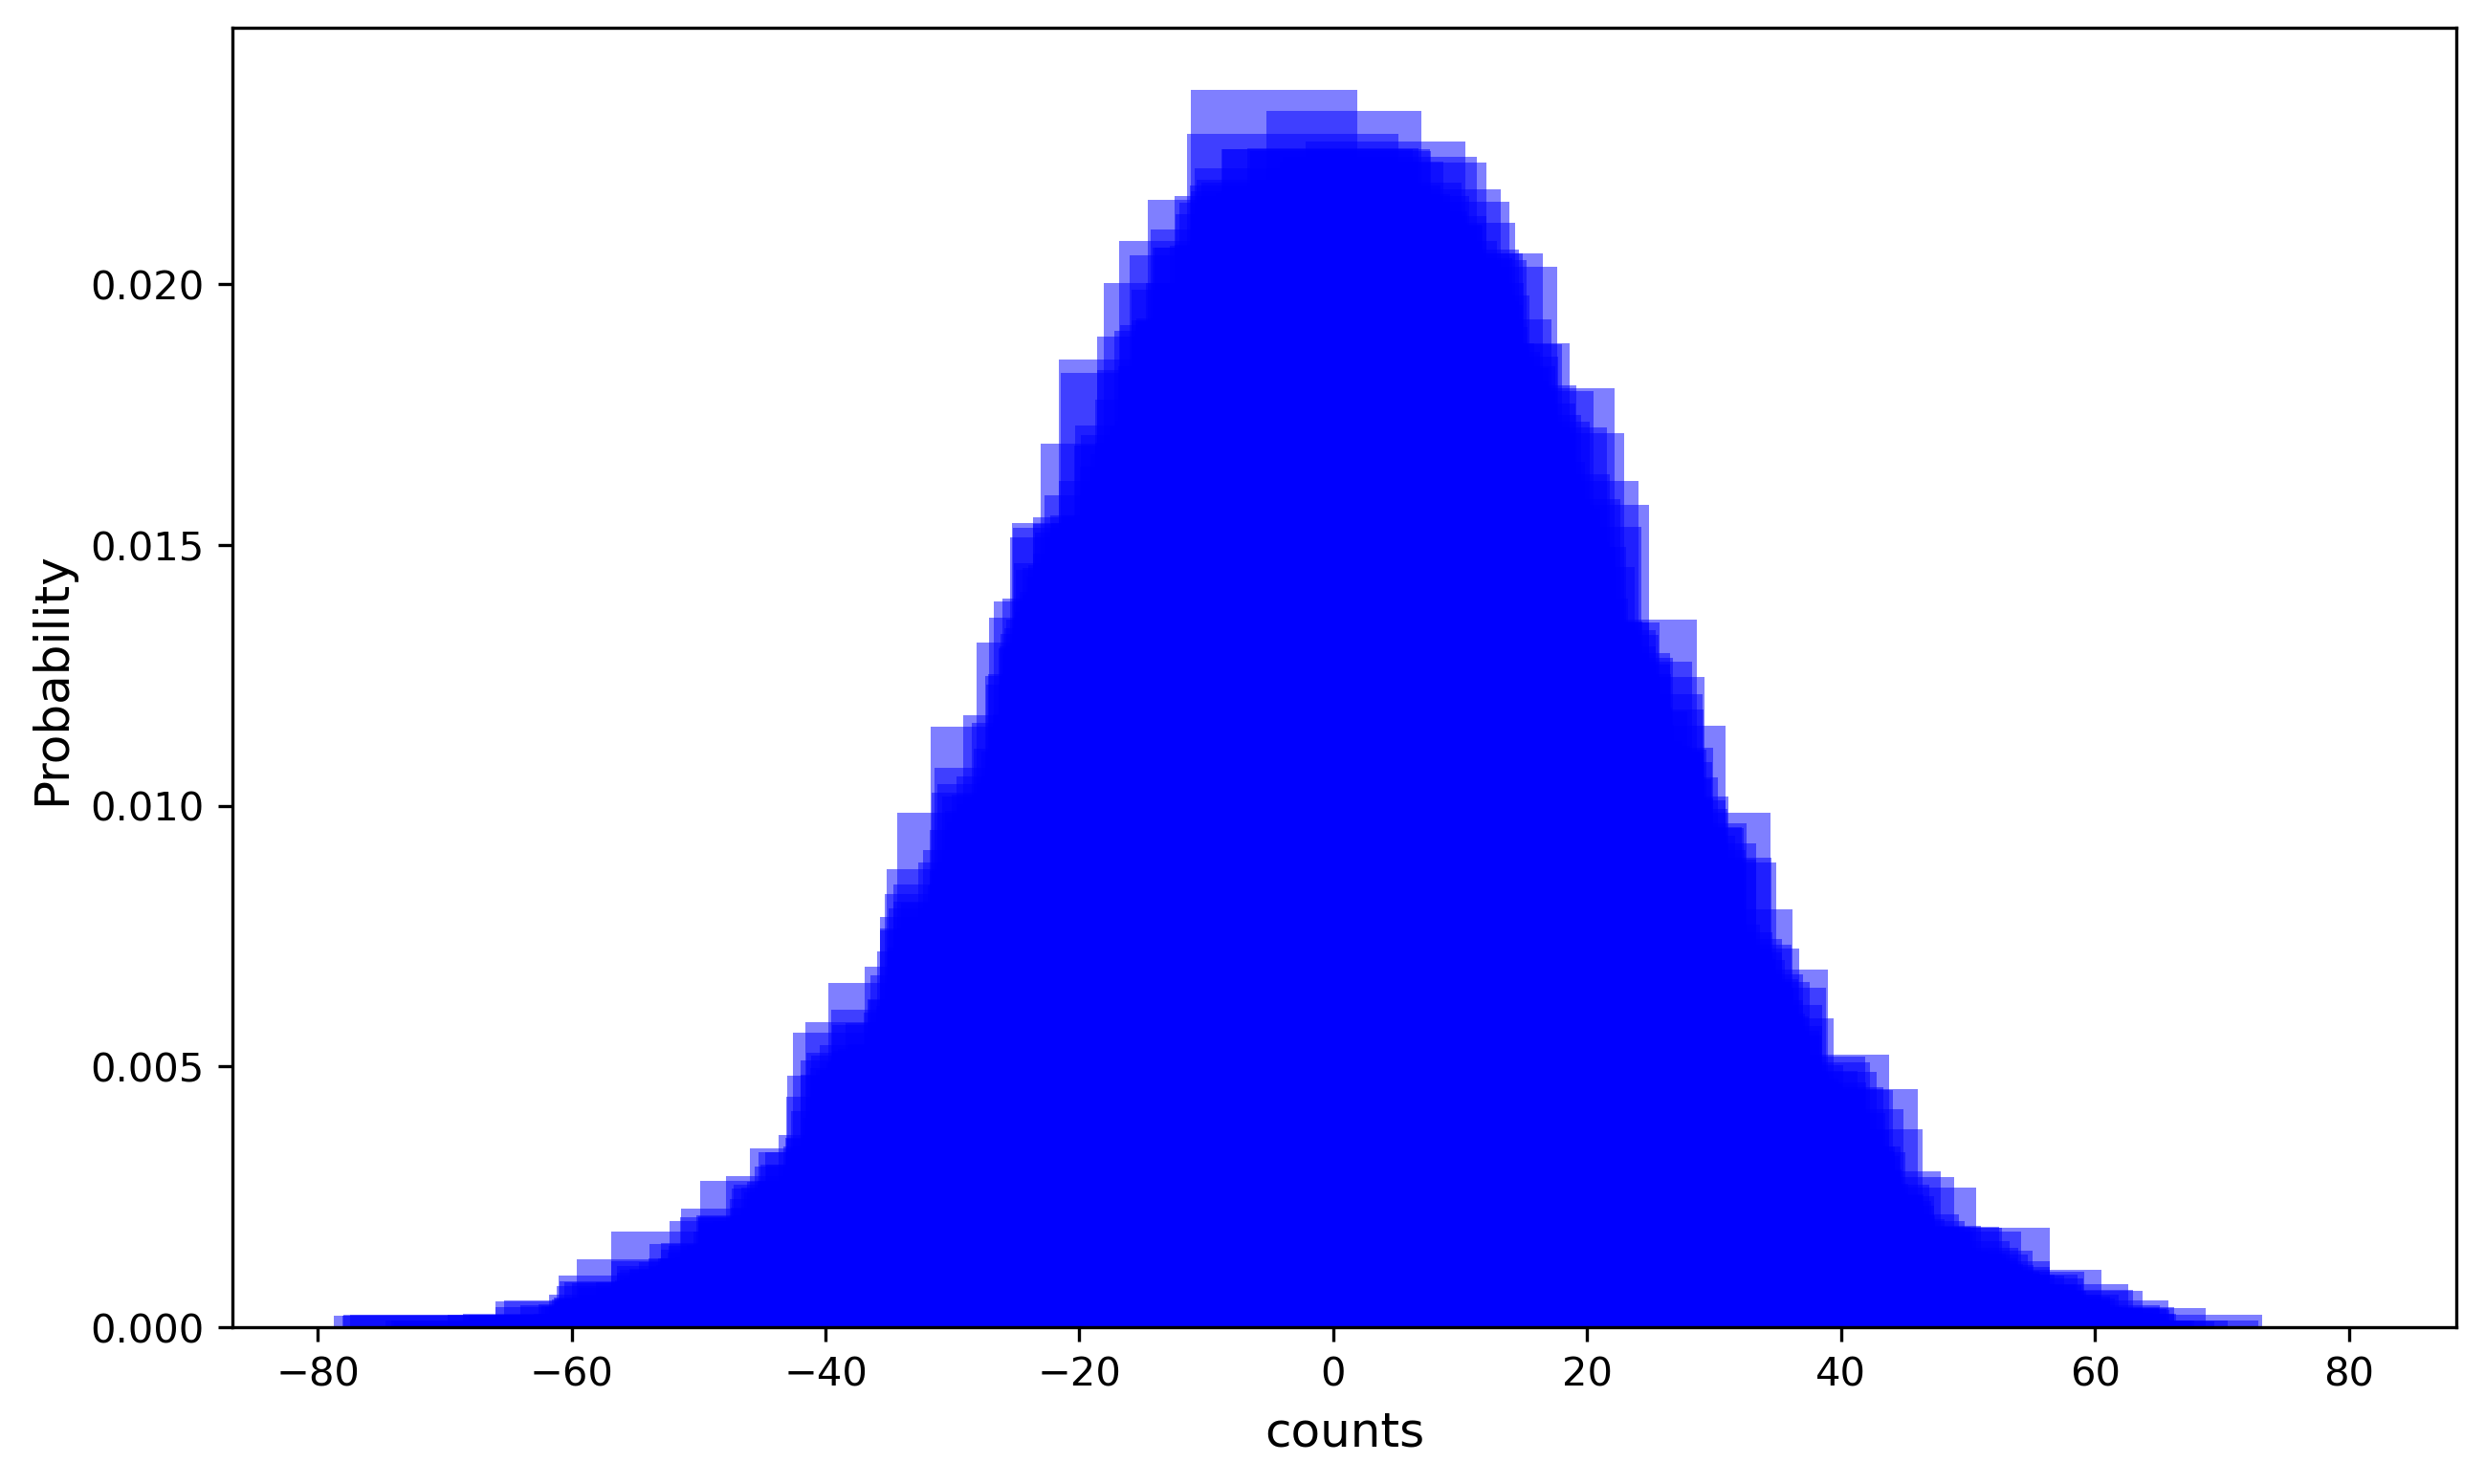

In [20]:
import math
fig, r = pyplot.subplots(figsize=(10,6), dpi = 300)

M = np.sqrt(eta * kappa)
tol = 1e-10
raw = ''
for m in result.measurement:
    
    data = m[:, 0].real / M
    array = []
    tbins = 8
    binwidth = (max(data) - min(data))/tbins
    for i in range(0, tbins + 1): 
        array.append(min(data) + binwidth*i)
    for x in data:
        for i in range(1, tbins + 1):
            if (x < array[i] + tol):
                raw = raw + format(i - 1, "b").zfill(int(math.log2(tbins))) 
                break
    #print(binwidth)
   
    counts, bins, bars = pyplot.hist(data, bins = array, density = 1, alpha = 0.5, color = 'blue')  

print(len(raw))
#print(raw)    

r.set_xlabel('counts', fontsize=12)
r.set_ylabel('Probability', fontsize=12)

<hr style="border:2px solid gray"> </hr>

## 5. Randomness extraction - Toeplitz Hashing

### 5.1. Min-entropy estimation

In [21]:
def minentropy(counts):
    m = max(counts)
    ind = None
    for i in range(0, len(counts)):
        if (m == counts[i]):
            ind = i
            break
    p = max(counts)*binwidth
    minentropy = -math.log2(p)
    
    return minentropy


### 5.2. toeplitzmatrix() function construction

In [22]:
from scipy.linalg import toeplitz
def toeplitzmatrix(seed, datasize):
    arg1 = []
    arg2 = []
    for i in range(0, datasize):
        arg1.append(seed[i])
    arg2.append(arg1[0])
    for i in range(0, len(seed) - datasize):
        arg2.append(seed[i + datasize])
    
    return toeplitz(arg1[::-1], arg2)

### 5.3. Toeplitz Hashing implementation

96032


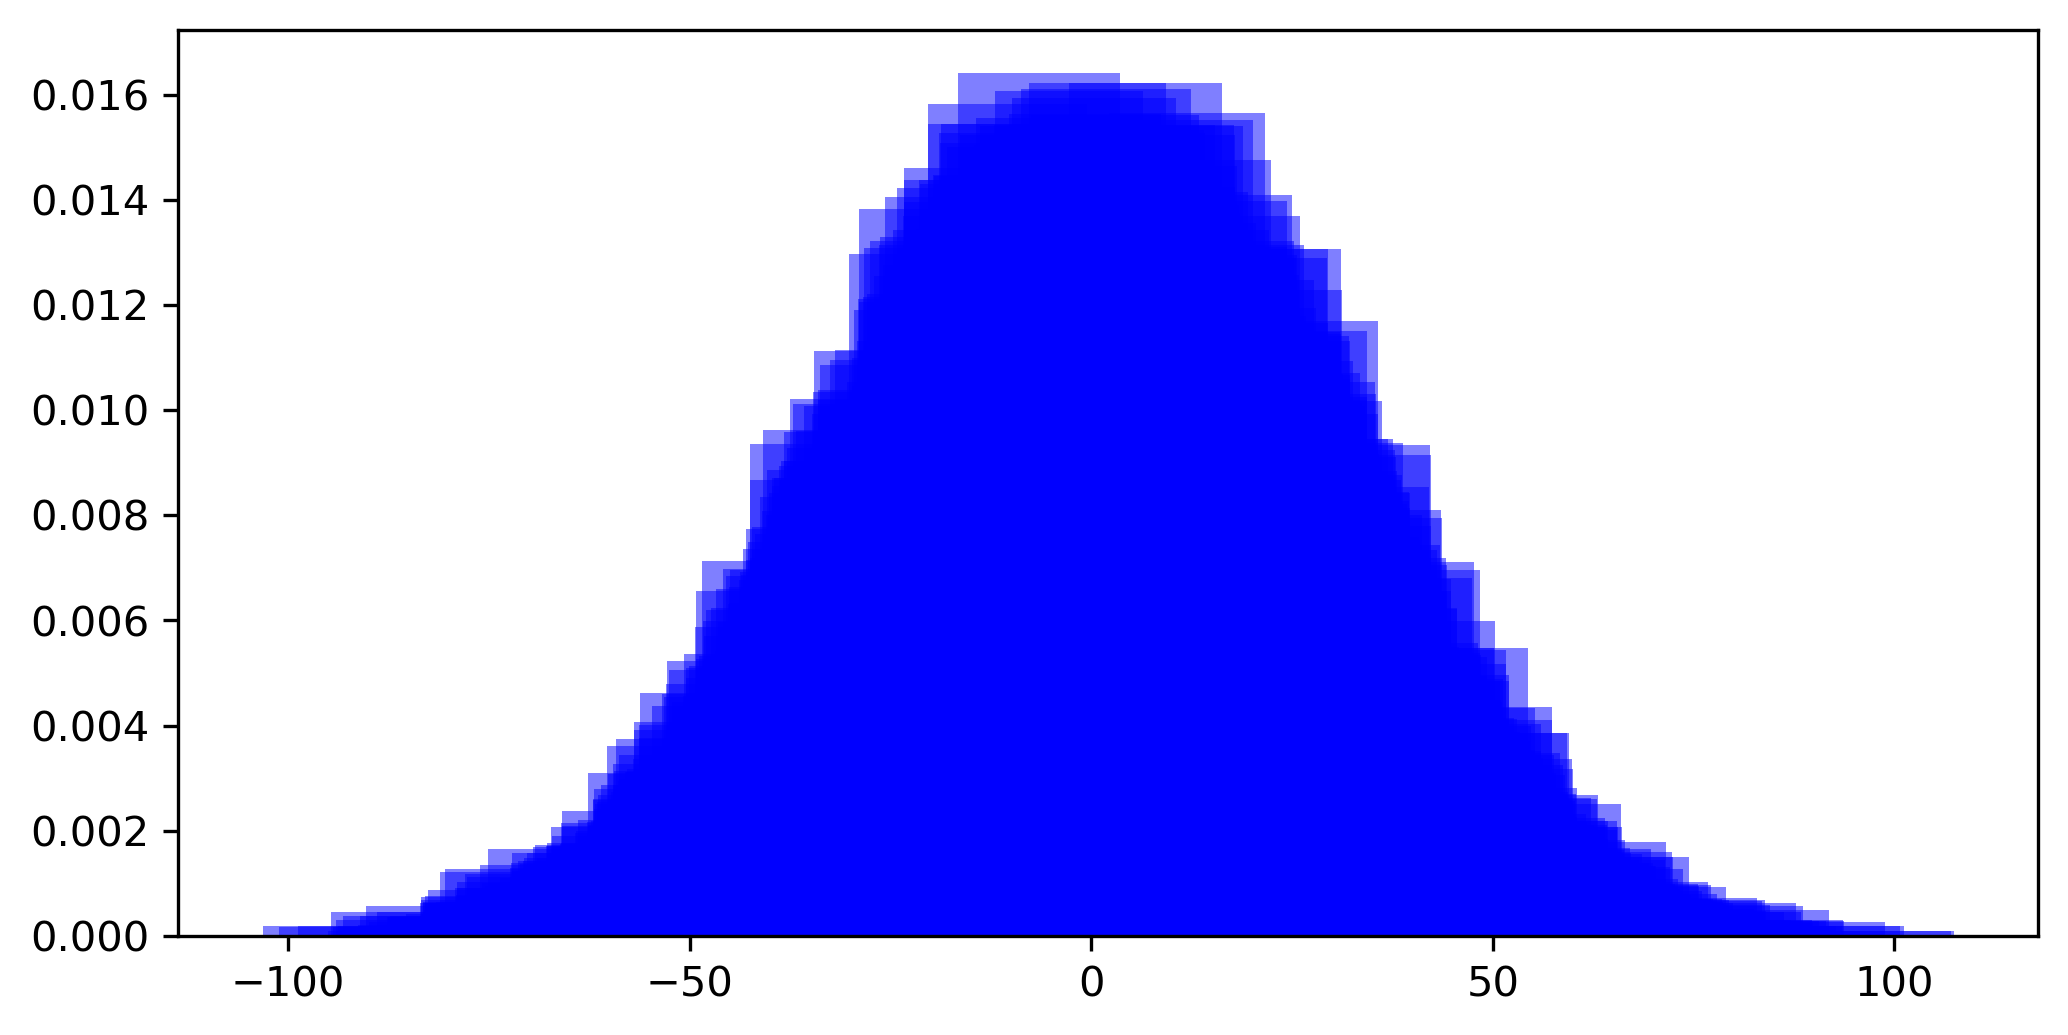

In [24]:
import math
from scipy.linalg import toeplitz
fig, ax1 = pyplot.subplots(figsize=(8,4), dpi = 300)

M = np.sqrt(eta * kappa)
epsilon = 1e-10
tol = 1e-10
d = []
sequence = ''
sum = 0
for m in result.measurement:
    
    raw = ''
    rawArr = []
    data = m[:, 0].real / M - m[:, 1].real / M
    array = []
    tbins = 8
    binwidth = (max(data) - min(data))/tbins
    for i in range(0, tbins + 1): 
        array.append(min(data) + binwidth*i)
    for x in data:
        for i in range(1, tbins + 1):
            if (x < array[i] + tol): 
                raw = raw + format(i - 1, "b").zfill(int(math.log2(tbins))) 
                break
                
    for i in range(0, len(raw)):
        rawArr.append(int(raw[i]))
    counts, bins, bars = pyplot.hist(data, bins = array, density = 1, alpha = 0.5, color = 'blue')  
    
    k = minentropy(counts)
    k = k/int(math.log2(tbins))
    u = len(raw)*k - 2*(math.log2(epsilon))
    r = len(raw) + u - 1
    seed = np.random.randint(2, size = int(r))

    tm = toeplitzmatrix(seed, len(raw))
    #print(tm)
    #print(raw)
    #print(len(raw))

    rawArr = np.array(rawArr)
    d = rawArr.T @ tm
    sum = sum + len(d)
    
    out = d%2
    #print(out)
    
    for i in range(0, len(out)):
        sequence = sequence + str(out[i])
#print(sum)
print(len(sequence))
#print(sequence)
    

    
    

### 5.4. Frequency of '0's and '1's in the extracted sequence

In [25]:
import sys
np.set_printoptions(threshold=sys.maxsize)
#print(d%2)
zero = 0
one = 1
t = sequence
for i in range(0, len(t)):
    if t[i] == '0':
        zero += 1
    else:
        one += 1
print(zero)
print(one)

47933
48100


## Versions

In [34]:
from qutip.ipynbtools import version_table

version_table()